# Tarea 3

## Tarea 3.1

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data_processed.csv")
df

,num_expediente,fecha,hora,localizacion,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,...,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,lesividad_Asistencia sanitaria ambulatoria con posterioridad,lesividad_Asistencia sanitaria inmediata en centro de salud o mutua,lesividad_Asistencia sanitaria sólo en el lugar del accidente,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Fallecido 24 horas,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria
0,2023S040280,2024-01-04,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,HORTALEZA,Colisión doble,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,...,0,0,0,0,0,0,0,1,0,0
1,2023S040280,2024-01-04,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,HORTALEZA,Colisión doble,Lluvia débil,Turismo,Conductor,De 55 a 59 años,...,0,0,0,0,0,0,0,0,0,1
2,2023S040309,2024-02-15,14:05:00,CALL. TESORO / CALL. MINAS,CENTRO,Colisión doble,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,...,0,0,0,0,1,0,0,0,0,0
3,2023S040309,2024-02-15,14:05:00,CALL. TESORO / CALL. MINAS,CENTRO,Colisión doble,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,...,0,0,0,0,0,0,0,0,0,1
4,2023S040310,2024-02-18,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,CHAMBERÍ,Colisión doble,Despejado,Turismo,Conductor,De 25 a 29 años,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39686,2024S030621,2024-10-18,17:05:00,PLAZA. LIMA / AVDA. CONCHA ESPINA,CHAMARTÍN,Colisión doble,Despejado,Turismo,Conductor,De 45 a 49 años,...,0,0,0,0,0,0,0,0,0,1
39687,2024S031786,2024-10-11,02:00:00,CALL. PRINCESA / CALL. ALBERTO AGUILERA,MONCLOA-ARAVACA,Alcance,Despejado,Turismo,Conductor,De 25 a 29 años,...,0,0,0,0,0,0,0,0,0,1
39688,2024S031786,2024-10-11,02:00:00,CALL. PRINCESA / CALL. ALBERTO AGUILERA,MONCLOA-ARAVACA,Alcance,Despejado,Turismo,Conductor,De 25 a 29 años,...,0,0,0,0,0,0,0,0,0,1
39689,2024S031786,2024-10-11,02:00:00,CALL. PRINCESA / CALL. ALBERTO AGUILERA,MONCLOA-ARAVACA,Alcance,Despejado,Turismo,Pasajero,De 21 a 24 años,...,0,0,0,0,0,0,0,0,0,1


In [2]:
df_numeric = df.select_dtypes(include=['number'])

El preprocesamiento para aplicar el algoritmo de kmeans, consta de un normalizado con minmaxscaler. Esto es fundamental para preservar las distancias proporcionales entre los datos, pues el algoritmo de kmeans actua con distancias euclídeas.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas numéricas
numeric_cols = df_numeric.select_dtypes(include=[np.number])

# Identificar columnas binarias
binary_cols = numeric_cols.columns[numeric_cols.nunique() == 2]

# Excluir las columnas que no deseas escalar (por ejemplo, mes y día de la semana en sus formas seno/coseno)
excluded_cols = ["dia_semana_sin", "dia_semana_cos", "rango_horario_sin", "rango_horario_cos"]

# Filtrar las columnas a escalar: numéricas pero no binarias y no en excluded_cols
cols_to_scale = numeric_cols.columns.difference(binary_cols).difference(excluded_cols)

# Escalar las columnas seleccionadas
scaler = MinMaxScaler()
df_scaled = df_numeric.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

In [4]:
df_scaled.head()

,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,año,mes,es_fin_semana,calle_1_cod,calle_2_cod,es_cruce,...,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,lesividad_Asistencia sanitaria ambulatoria con posterioridad,lesividad_Asistencia sanitaria inmediata en centro de salud o mutua,lesividad_Asistencia sanitaria sólo en el lugar del accidente,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Fallecido 24 horas,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria
0,0.615240,0.631145,0,0.0,0.0,0.000000,0,0.167840,0.013390,1,...,0,0,0,0,0,0,0,1,0,0
1,0.615240,0.631145,0,0.0,0.0,0.000000,0,0.167840,0.013390,1,...,0,0,0,0,0,0,0,0,0,1
2,0.427963,0.405960,0,0.0,0.0,0.111111,0,0.790088,0.614436,1,...,0,0,0,0,1,0,0,0,0,0
3,0.427963,0.405960,0,0.0,0.0,0.111111,0,0.790088,0.614436,1,...,0,0,0,0,0,0,0,0,0,1
4,0.428510,0.425790,0,0.0,0.0,0.111111,1,0.890632,0.730336,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
X = df_scaled.to_numpy()

## Tarea 3.2

### Dendogram

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

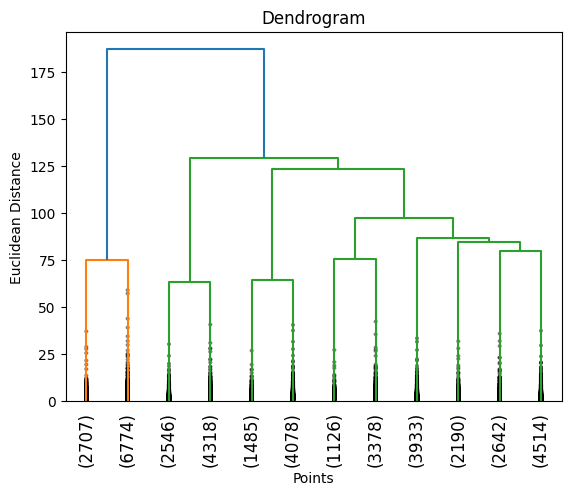

In [7]:
def plot_dendrogram():
    points = X.tolist()

    # Calculate distances between points or groups of points
    Z = linkage(points, metric='euclidean', method='ward')

    plt.title('Dendrogram')
    plt.xlabel('Points')
    plt.ylabel('Euclidean Distance')

    # Generate Dendrogram
    dendrogram(
        Z,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True
    )

    plt.show()

plot_dendrogram()

Se puede apreciar aquí que la mejor distancia parece ser una euclidean distance de 100 pues es cuando se puede ver un salto significativo de en la altura del dendograma, a partir de ahí los clusters comienzan a juntarse más rápidamente, por lo tanto aquellos que están por debajo de 100, son los clusters que están más separados. En total, se pueden contar 5 clusters.

### Elbow Method

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
LOOPS = 20
MAX_ITERATIONS = 10
INITIALIZE_CLUSTERS = 'k-means++'
CONVERGENCE_TOLERANCE = 0.001
NUM_THREADS = 8

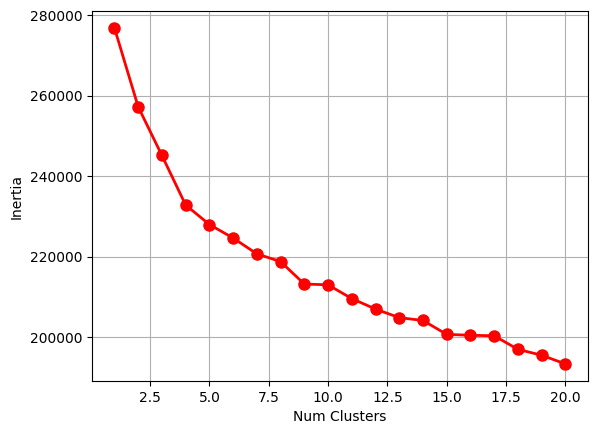

In [10]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()


def select_clusters(loops, max_iterations, init_cluster, tolerance):
    # Read data set
    points = X.tolist()

    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance)

        # Calculate Kmeans
        kmeans.fit(points)

        # Obtain inertia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

select_clusters(LOOPS, MAX_ITERATIONS, INITIALIZE_CLUSTERS, CONVERGENCE_TOLERANCE)

El Elbow Method evalúa cómo disminuye la inercia (suma de distancias cuadradas de los puntos a sus centroides) al aumentar el número de clusters en K-Means. El "codo" indica el punto donde agregar más clusters no reduce significativamente la inercia, señalando el número óptimo de clusters. Mirando la gráfica, destaca un codo para n_clusters=4, a partir de entonces el descenso de la pendiente se estabiliza.

### Gap

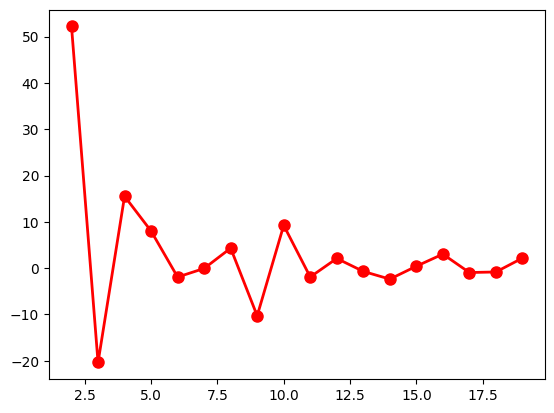

In [11]:
def plot_gap():
    points = X.tolist()

    # Calculate distances between points or groups of points
    Z = linkage(points, metric='euclidean', method='ward')

    # Obtain the last 10 distances between points
    last = Z[-20:, 2]
    num_clustres = np.arange(1, len(last) + 1)

    # Calculate Gap
    gap = np.diff(last, n=2)  # second derivative
    plt.plot(num_clustres[:-2] + 1, gap[::-1], 'ro-', markersize=8, lw=2)
    plt.show()

plot_gap()

El Gap compara la inercia de los clusters en los datos reales con la inercia en datos aleatorios simulados. El número óptimo de clusters es donde la diferencia entre estas inercias es máxima, indicando que los clusters son significativamente mejores que el ruido.
Mirando la gráfica, este valor se encuentra para n_clusters=4, al igual que el Elbow Mehtod.

## Tarea 3.3

### Índice de dunn

Número de clusters: 2, Índice de Dunn: 0.16197836669971277
Número de clusters: 3, Índice de Dunn: 0.16958208410514436
Número de clusters: 4, Índice de Dunn: 0.17431605711430523
Número de clusters: 5, Índice de Dunn: 0.17431605711430523
Número de clusters: 6, Índice de Dunn: 0.17480831877604097
Número de clusters: 7, Índice de Dunn: 0.17480831877604097
Número de clusters: 8, Índice de Dunn: 0.17240537667163033
Número de clusters: 9, Índice de Dunn: 0.17594915656104773
Número de clusters: 10, Índice de Dunn: 0.17667312994568937


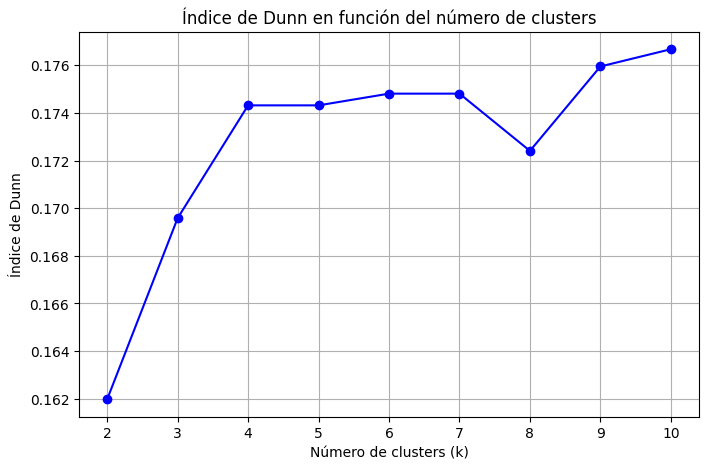

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def dunn_index(data, labels):
    """
    Calcula el índice de Dunn para evaluar la calidad del clustering.
    
    :param data: ndarray, datos originales
    :param labels: list, etiquetas de cluster asignadas a cada punto
    :return: índice de Dunn
    """
    clusters = [data[labels == i] for i in np.unique(labels)]
    
    inter_cluster_distances = [
        np.min(cdist(cluster_i, cluster_j))
        for i, cluster_i in enumerate(clusters)
        for j, cluster_j in enumerate(clusters)
        if i != j
    ]
    
    intra_cluster_distances = [
        np.max(cdist(cluster, cluster)) for cluster in clusters if len(cluster) > 1
    ]
    
    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# 1. Rango de clusters a probar
cluster_range = range(2, 11) 
dunn_indices = []

# 2. Iterar sobre diferentes números de clusters y calcular el Índice de Dunn
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    dunn = dunn_index(df_scaled, labels)
    dunn_indices.append(dunn)
    print(f"Número de clusters: {k}, Índice de Dunn: {dunn}")

# 3. Graficar el Índice de Dunn
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, dunn_indices, marker='o', linestyle='-', color='b')
plt.title('Índice de Dunn en función del número de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice de Dunn')
plt.grid(True)
plt.show()

Con el índice de Dunn se puede apreciar que el número de clusters establecidos anteriormente (4), obtiene un buen valor en el índice de Dunn. Al parecer 9 o 10 clusters ofrecen valores ligeramente mejores que 4, es por ello que se comparan más índices para obtener una comparativa más globalizada.


### Índice de Davies-Bouldin

In [14]:
%matplotlib inline
from sklearn.metrics import davies_bouldin_score

scores = []

# Aplicar K-Means y calcular Davies-Bouldin Score
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=1).fit(X)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(X, labels)
    scores.append(db_score)
    print(f"Número de clusters: {i}, DB Score: {db_score}")

Número de clusters: 2, DB Score: 3.6730739099237577
Número de clusters: 3, DB Score: 3.4749377935533334
Número de clusters: 4, DB Score: 3.1334886515452194
Número de clusters: 5, DB Score: 3.4654250412779937
Número de clusters: 6, DB Score: 3.3934300068922827
Número de clusters: 7, DB Score: 3.4867832102640657


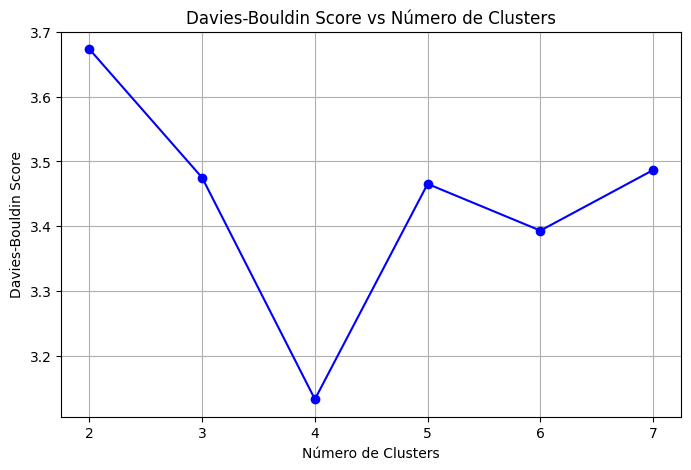

In [15]:
# Graficar DB Score frente al número de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 8), scores, marker='o', linestyle='-', color='b')
plt.title('Davies-Bouldin Score vs Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()

Para el índice de Davies-Bouldin, el mejor número de clusters, es aquel que obtiene el menor valor para dicho índice que en este caso es claramente el 4.

### Calinski-Harabasz

Número de clusters: 2, CH Score: 2879.6635127918753
Número de clusters: 3, CH Score: 2441.461623085167
Número de clusters: 4, CH Score: 2499.8749574781136
Número de clusters: 5, CH Score: 1940.0553333454818
Número de clusters: 6, CH Score: 1890.0349117265298
Número de clusters: 7, CH Score: 1673.7974779745184


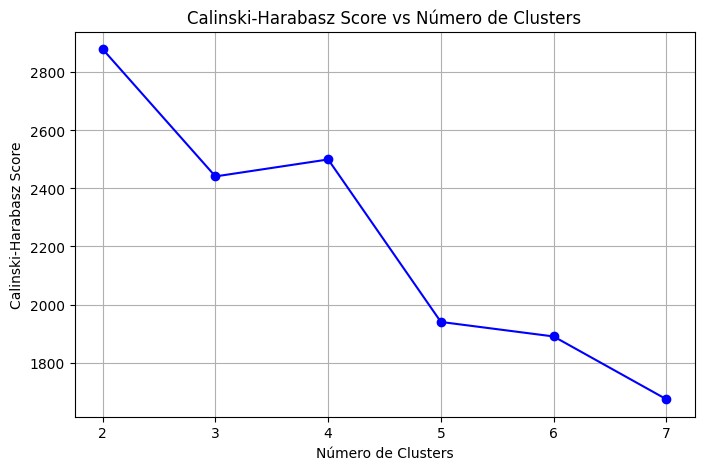

In [17]:
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicar K-Means y calcular el Índice de Calinski-Harabasz
scores = []

for i in range(2, 8):  # Cambia el rango según necesites
    kmeans = KMeans(n_clusters=i, random_state=1).fit(X)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(X, labels)
    scores.append(ch_score)
    print(f"Número de clusters: {i}, CH Score: {ch_score}")

# Graficar Calinski-Harabasz Score frente al número de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 8), scores, marker='o', linestyle='-', color='b')
plt.title('Calinski-Harabasz Score vs Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.show()

Con Calinski-Harabasz, el número de clustetrs que mejores resultados da, es 2, seguido después de 4.

### Índice de Silueta

Número de clusters: 2, Silhouette Score: 0.06691914698591928
Número de clusters: 3, Silhouette Score: 0.06034777282473788
Número de clusters: 4, Silhouette Score: 0.07054358374494397
Número de clusters: 5, Silhouette Score: 0.06179074461004866
Número de clusters: 6, Silhouette Score: 0.06026976805804705
Número de clusters: 7, Silhouette Score: 0.05158759676581704
Número de clusters: 8, Silhouette Score: 0.04958443048296621
Número de clusters: 9, Silhouette Score: 0.053187430348902186
Número de clusters: 10, Silhouette Score: 0.05036884917484392
Número de clusters: 11, Silhouette Score: 0.04749190051654177
Número de clusters: 12, Silhouette Score: 0.04880639243760659
Número de clusters: 13, Silhouette Score: 0.04929383748338195
Número de clusters: 14, Silhouette Score: 0.04961208289520142
Número de clusters: 15, Silhouette Score: 0.043663222145314796
Número de clusters: 16, Silhouette Score: 0.04535065530778049
Número de clusters: 17, Silhouette Score: 0.04493319283963164
Número de clus

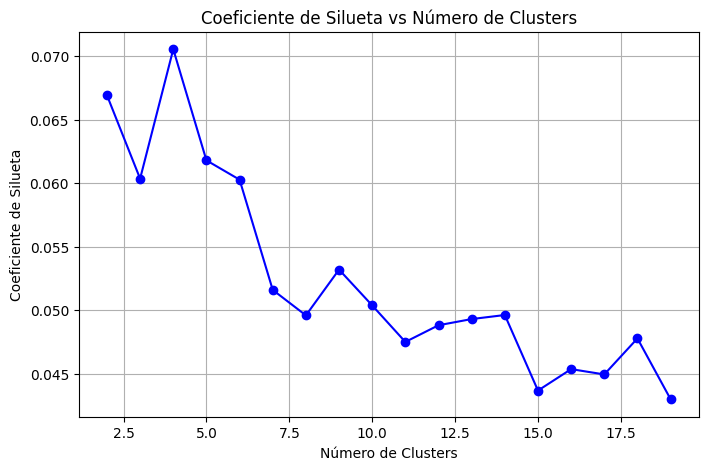

In [19]:
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Calcular el coeficiente de silueta para diferentes números de clusters
silhouette_scores = []

for i in range(2, 20):  # Cambia el rango según necesites
    kmeans = KMeans(n_clusters=i, random_state=1).fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Número de clusters: {i}, Silhouette Score: {silhouette_avg}")

# Graficar el coeficiente de silueta frente al número de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Coeficiente de Silueta vs Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)
plt.show()

Observando el gráfico, se aprecia que el índice de silueta da como mejor valor claramente el 4, estando muy por encima del resto de valores.

## Tarea 3.4

Vamos a estudiar qué elementos encontramos en cada cluster y tratar de encontrar las características que diferencian uno de otro. Para ello, añadimos una nueva columna a nuestro dataframe indicando el cluster al que pertenece cada fila.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

Antes de nada, vamos a observar cuantos ejemplos tenemos de cada cluster

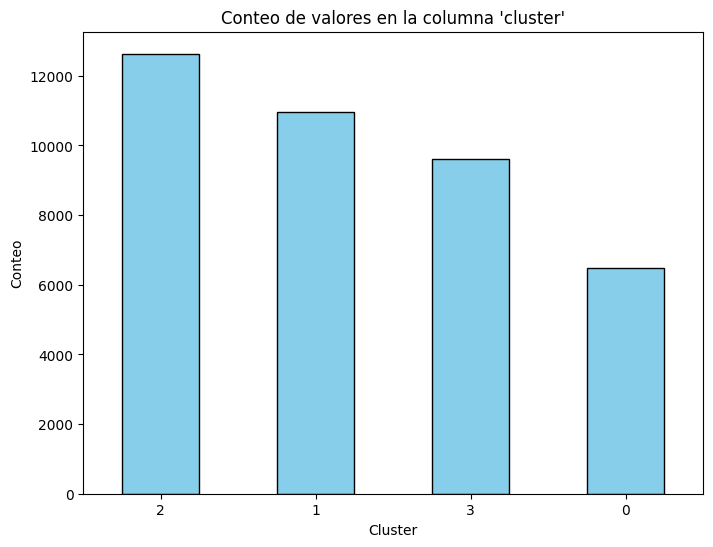

cluster
2    12633
1    10950
3     9618
0     6490
Name: count, dtype: int64


In [54]:
import matplotlib.pyplot as plt

# Graficamos el conteo de valores en la columna 'cluster'
plt.figure(figsize=(8, 6))
df['cluster'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Conteo de valores en la columna 'cluster'")
plt.xlabel("Cluster")
plt.ylabel("Conteo")
plt.xticks(rotation=0)
plt.show()
print(df['cluster'].value_counts())

Vemos que la distribución de los ejemplos por cluster no es uniforme y que el cluster contiene poco más de la mitad de datos que el cluster 2. Vamos a analizar de qué están compuestos cada uno.

### Etadísticas descriptivas por cluster

In [89]:
grouped = df.groupby('cluster')
desc_stats = grouped.describe()
print("Estadísticas descriptivas de variables numéricas por cluster:\n", desc_stats)

Estadísticas descriptivas de variables numéricas por cluster:
         coordenada_x_utm                                                   \
                   count           mean          std       min        25%   
cluster                                                                     
0                 6490.0  442085.795686  3449.480365  429306.0  439943.00   
1                10950.0  442167.418721  3501.076225  429400.0  439984.25   
2                12633.0  442097.332700  3527.733799  429446.0  439813.00   
3                 9618.0  441852.897588  3454.797950  429177.0  439726.75   

                                       coordenada_y_utm                ...  \
              50%        75%       max            count          mean  ...   
cluster                                                                ...   
0        441690.0  443977.75  454754.0           6490.0  4.474864e+06  ...   
1        441927.5  444002.00  454660.0          10950.0  4.474698e+06  ...   
2      

Vamos a analizar columna por columna la distribución de las variables en los clusters para ver si conseguimos encontrar relaciones de agrupación.

### Análisis de variables

##### sexo

In [23]:
sexo_cluster = pd.crosstab(df['cluster'], df['sexo'])

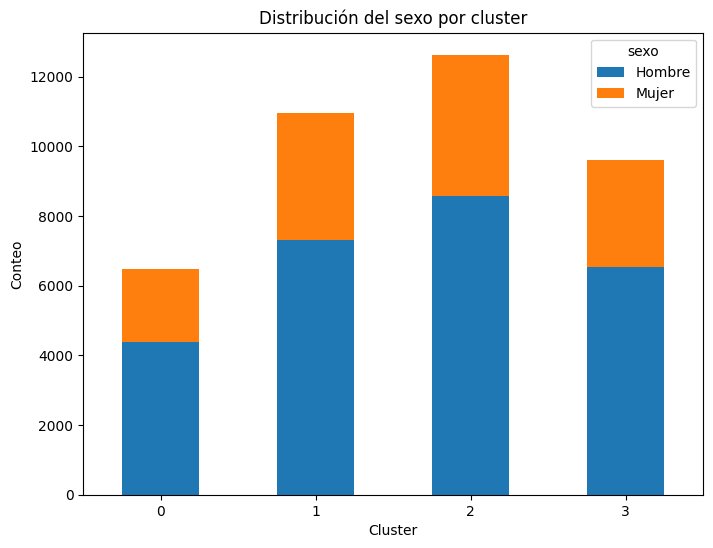

In [25]:
sexo_cluster.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Distribución del sexo por cluster")
plt.xlabel("Cluster")
plt.ylabel("Conteo")
plt.xticks(rotation=0)
plt.show()

Vemos cómo el sexo se distribuye de una manera muy equitativa en todos los clusters. Vamos a ir probando con el resto de características.

##### alcohol

In [26]:
alcohol_cluster = pd.crosstab(df['cluster'], df['positiva_alcohol'])

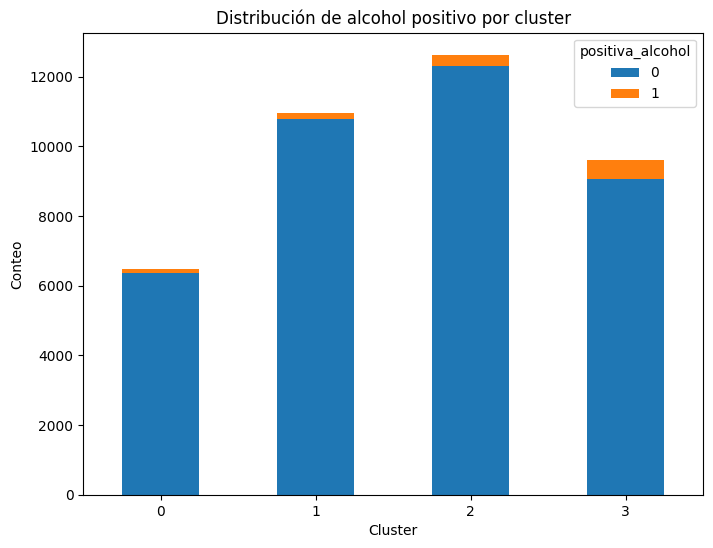

In [27]:
alcohol_cluster.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Distribución de alcohol positivo por cluster")
plt.xlabel("Cluster")
plt.ylabel("Conteo")
plt.xticks(rotation=0)
plt.show()

Esta variable también está distribuida por todos los clusters.

##### droga

In [28]:
droga_cluster = pd.crosstab(df['cluster'], df['positiva_droga'])

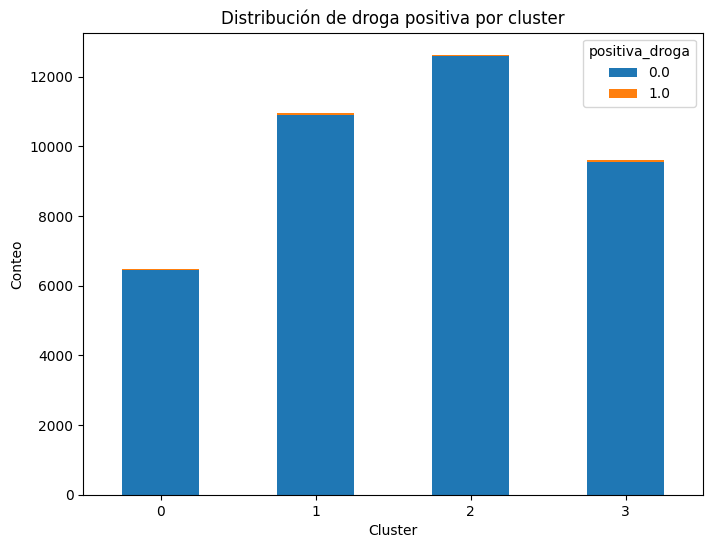

In [29]:
droga_cluster.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Distribución de droga positiva por cluster")
plt.xlabel("Cluster")
plt.ylabel("Conteo")
plt.xticks(rotation=0)
plt.show()

Con la variable droga, pasa lo mismo que con la variable alcohol

##### tipo_persona


Distribución en porcentaje de tipo_persona_Conductor por cluster:
tipo_persona_Conductor          0          1
cluster                                     
0                       16.009245  83.990755
1                       18.310502  81.689498
2                       19.195757  80.804243
3                       24.194219  75.805781


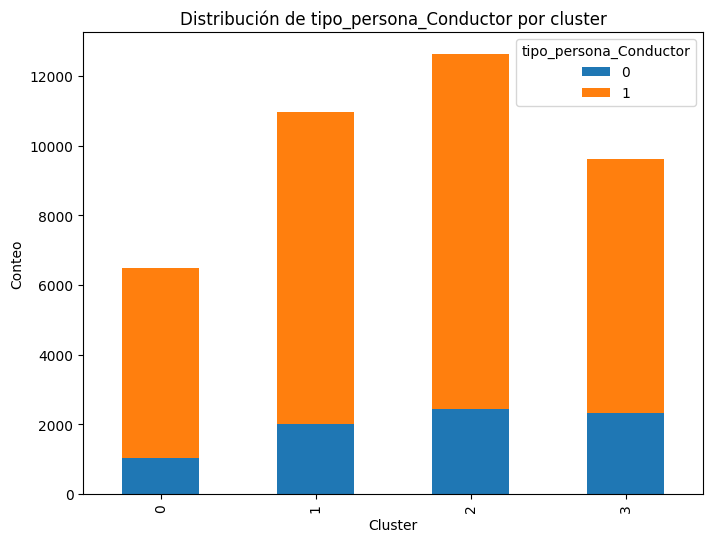


Distribución en porcentaje de tipo_persona_Pasajero por cluster:
tipo_persona_Pasajero          0          1
cluster                                    
0                      87.966102  12.033898
1                      84.812785  15.187215
2                      83.923059  16.076941
3                      78.706592  21.293408


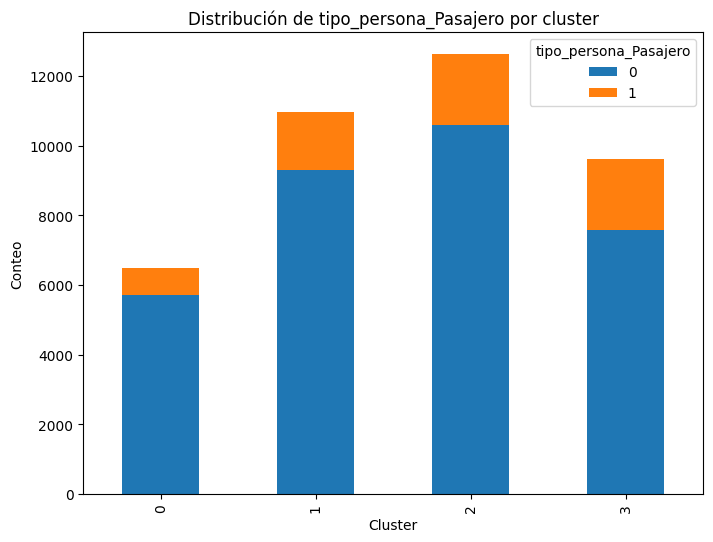


Distribución en porcentaje de tipo_persona_Peatón por cluster:
tipo_persona_Peatón          0         1
cluster                                 
0                    96.024653  3.975347
1                    96.876712  3.123288
2                    96.881184  3.118816
3                    97.099189  2.900811


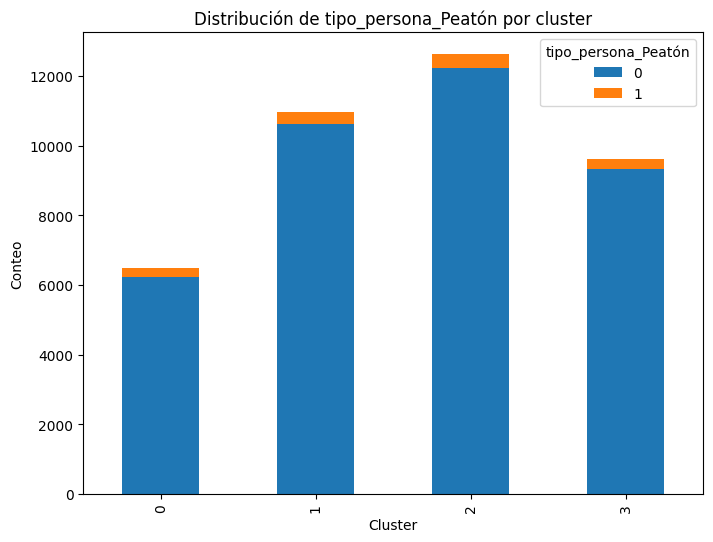

In [68]:
import pandas as pd

tipo_persona_columns = ['tipo_persona_Conductor',
                         'tipo_persona_Pasajero',
                         'tipo_persona_Peatón']

for var in tipo_persona_columns:
    ctab = pd.crosstab(df['cluster'], df[var])
    ctab_percentage = pd.crosstab(df['cluster'], df[var], normalize='index') * 100

    print(f"\nDistribución en porcentaje de {var} por cluster:")
    print(ctab_percentage)
    
    ctab.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f"Distribución de {var} por cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Conteo")
    plt.show()

Aquí podemos ver cómo hay ligeras variaciones entre clusters. En el cluster 0, encontramos muchos más conductores (un 83%) que en el cluster 3 (un 75%).  
Respecto a los pasajeros, encontramos más diferencias entre el cluster 0 y el 3, ya que el 12% del cluster 0 son pasajeros mientras que en el cluster 3 son el 21%

##### tipo_accidente


Distribución en porcentaje de tipo_accidente_Alcance por cluster:
tipo_accidente_Alcance          0          1
cluster                                     
0                       76.949153  23.050847
1                       74.429224  25.570776
2                       75.247368  24.752632
3                       77.656477  22.343523


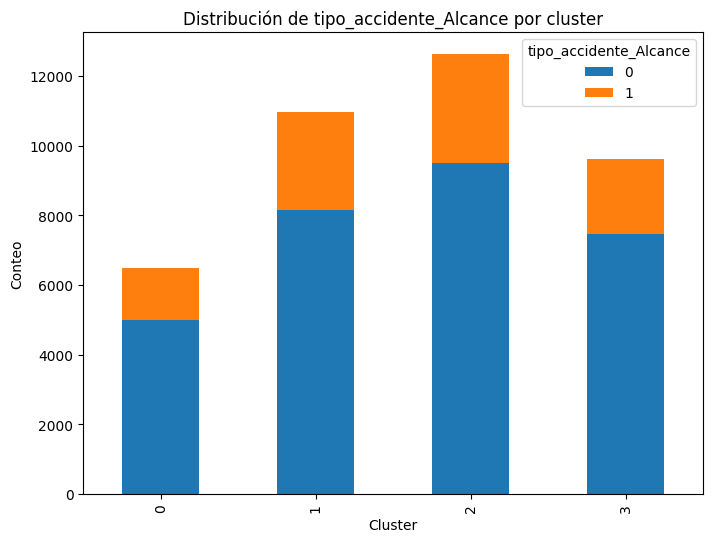


Distribución en porcentaje de tipo_accidente_Atropello a persona por cluster:
tipo_accidente_Atropello a persona          0         1
cluster                                                
0                                   92.634823  7.365177
1                                   94.182648  5.817352
2                                   94.181905  5.818095
3                                   94.520690  5.479310


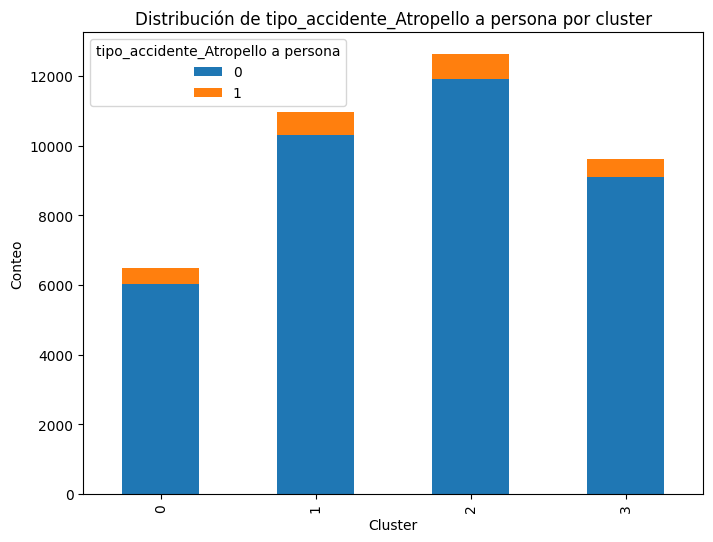


Distribución en porcentaje de tipo_accidente_Caída por cluster:
tipo_accidente_Caída          0         1
cluster                                  
0                     95.146379  4.853621
1                     94.054795  5.945205
2                     94.933903  5.066097
3                     94.312747  5.687253


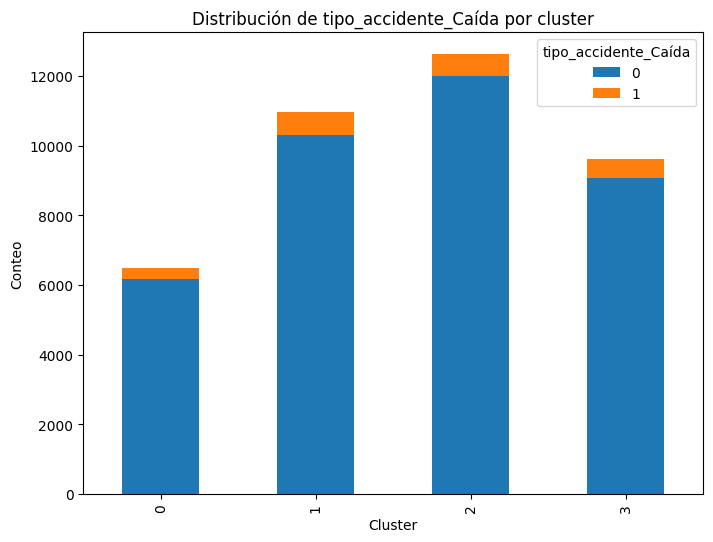


Distribución en porcentaje de tipo_accidente_Choque contra obstáculo o elemento de la vía por cluster:
tipo_accidente_Choque contra obstáculo o elemento de la vía          0  \
cluster                                                                  
0                                                            89.460709   
1                                                            91.598174   
2                                                            90.081532   
3                                                            85.516739   

tipo_accidente_Choque contra obstáculo o elemento de la vía          1  
cluster                                                                 
0                                                            10.539291  
1                                                             8.401826  
2                                                             9.918468  
3                                                            14.483261  


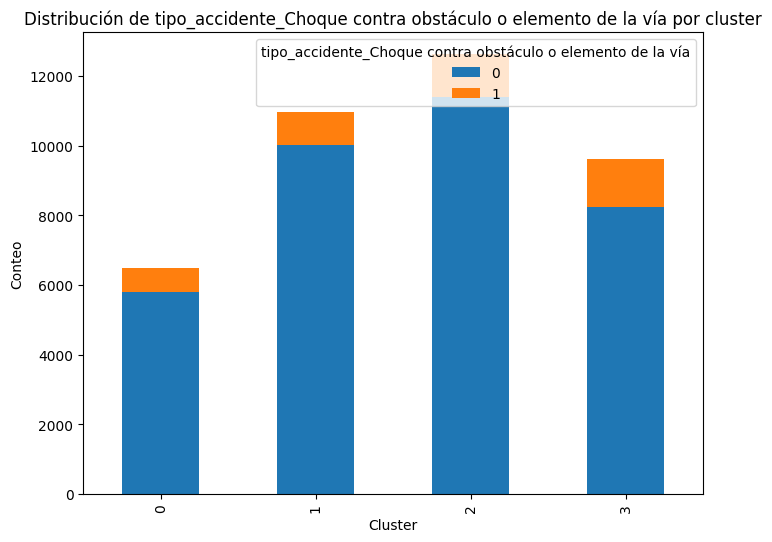


Distribución en porcentaje de tipo_accidente_Colisión doble por cluster:
tipo_accidente_Colisión doble          0          1
cluster                                            
0                              54.576271  45.423729
1                              54.666667  45.333333
2                              53.526478  46.473522
3                              55.448118  44.551882


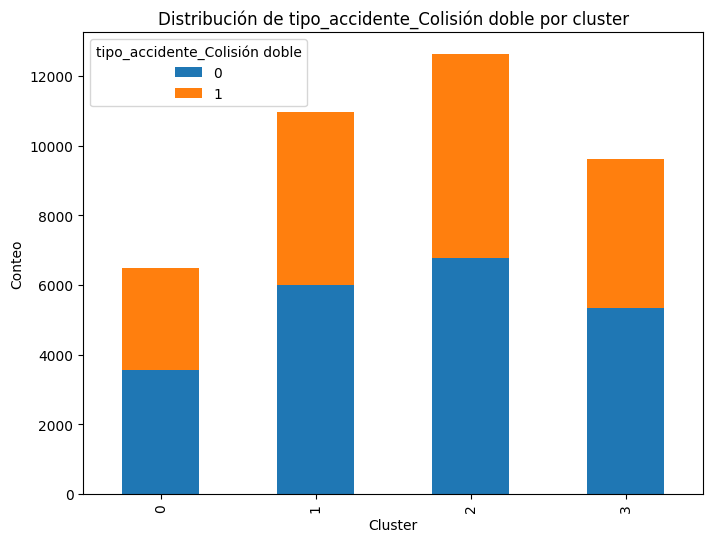


Distribución en porcentaje de tipo_accidente_Colisión múltiple por cluster:
tipo_accidente_Colisión múltiple          0         1
cluster                                              
0                                 94.776579  5.223421
1                                 94.511416  5.488584
2                                 94.775588  5.224412
3                                 95.726762  4.273238


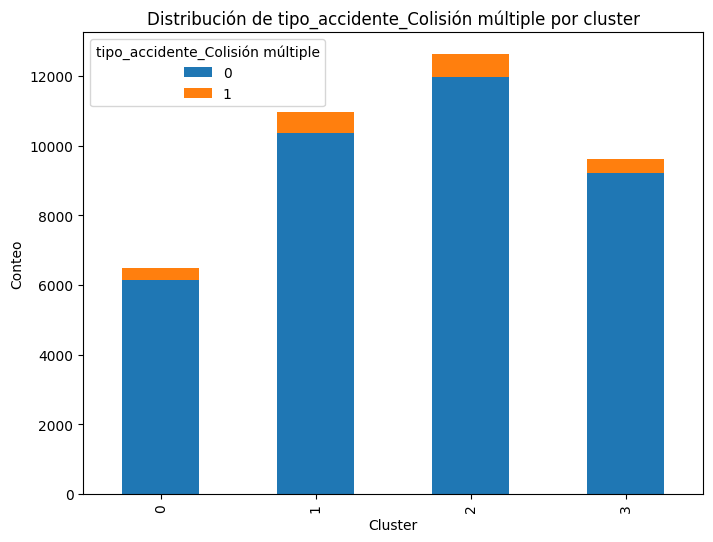


Distribución en porcentaje de tipo_accidente_Otras causas por cluster:
tipo_accidente_Otras causas          0         1
cluster                                         
0                            96.995378  3.004622
1                            96.913242  3.086758
2                            97.490699  2.509301
3                            97.431899  2.568101


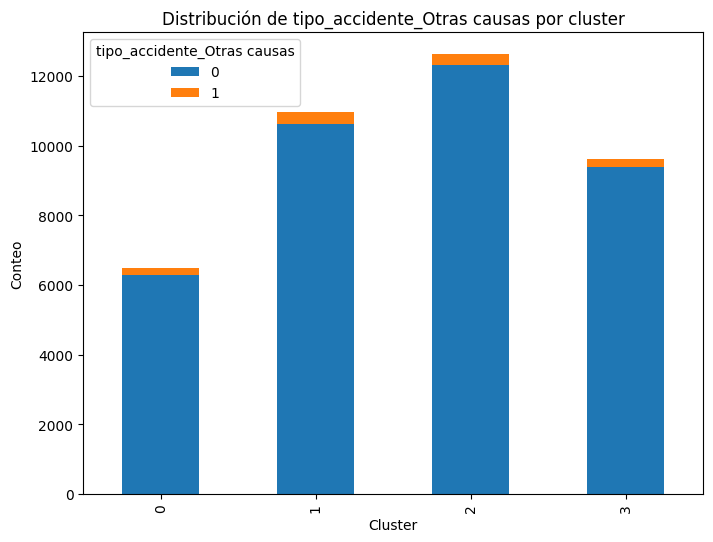


Distribución en porcentaje de tipo_accidente_Vuelco por cluster:
tipo_accidente_Vuelco          0         1
cluster                                   
0                      99.460709  0.539291
1                      99.643836  0.356164
2                      99.762527  0.237473
3                      99.386567  0.613433


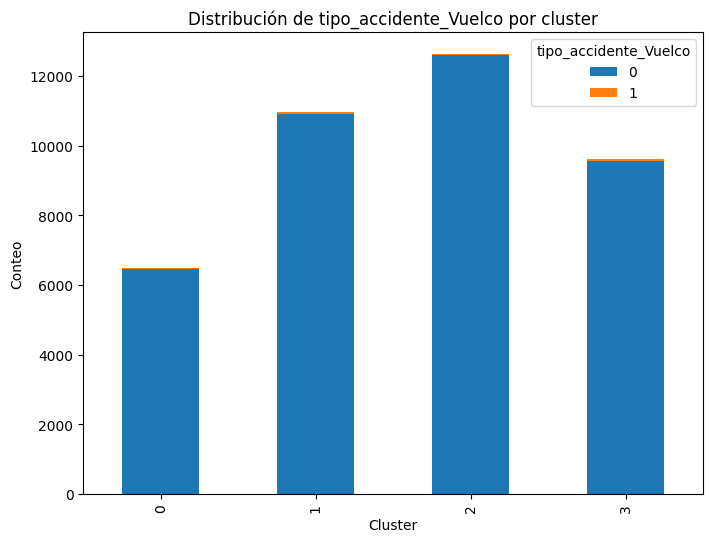

In [69]:
accidente_columns = [col for col in df.columns if col.startswith('tipo_accidente_')]

for accidente in accidente_columns:
    ctab = pd.crosstab(df['cluster'], df[accidente])
    ctab_percentage = pd.crosstab(df['cluster'], df[accidente], normalize='index') * 100

    print(f"\nDistribución en porcentaje de {accidente} por cluster:")
    print(ctab_percentage)
    
    ctab.plot(kind='bar', stacked=True, figsize=(8,6))
    plt.title(f"Distribución de {accidente} por cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Conteo")
    plt.show()

Con los tipos de accidentes, no encontramos apenas variaciones entre las distribuciones de los clusters. La más notable sería en "accidentes de choque contra obstáculo o elemento de la vía", donde encontramos tan solo un 8,4% en el cluster 1 y un 14,48 en el cluster 3.

##### lesividad


Distribución en porcentaje de lesividad_Asistencia sanitaria ambulatoria con posterioridad por cluster:
lesividad_Asistencia sanitaria ambulatoria con posterioridad          0  \
cluster                                                                   
0                                                             98.936826   
1                                                             98.940639   
2                                                             98.860128   
3                                                             98.752339   

lesividad_Asistencia sanitaria ambulatoria con posterioridad         1  
cluster                                                                 
0                                                             1.063174  
1                                                             1.059361  
2                                                             1.139872  
3                                                             1.247661  


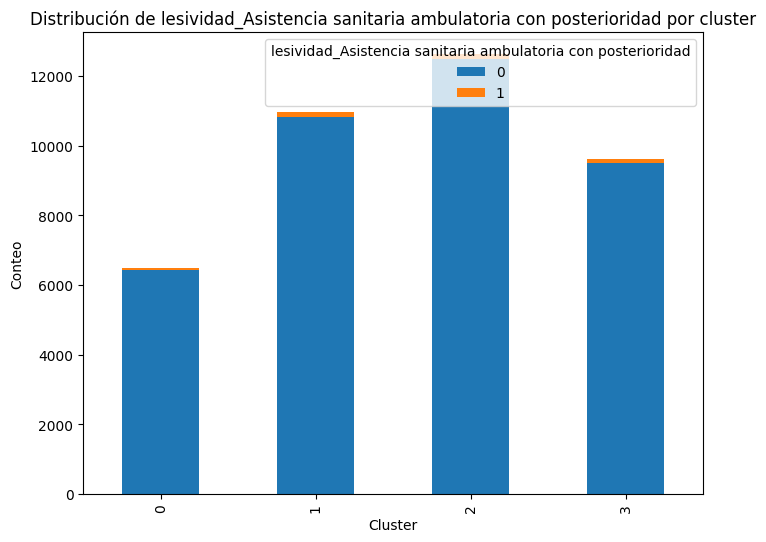


Distribución en porcentaje de lesividad_Asistencia sanitaria inmediata en centro de salud o mutua por cluster:
lesividad_Asistencia sanitaria inmediata en centro de salud o mutua          0  \
cluster                                                                          
0                                                                    96.964561   
1                                                                    97.716895   
2                                                                    97.601520   
3                                                                    97.982949   

lesividad_Asistencia sanitaria inmediata en centro de salud o mutua         1  
cluster                                                                        
0                                                                    3.035439  
1                                                                    2.283105  
2                                                                    2.3984

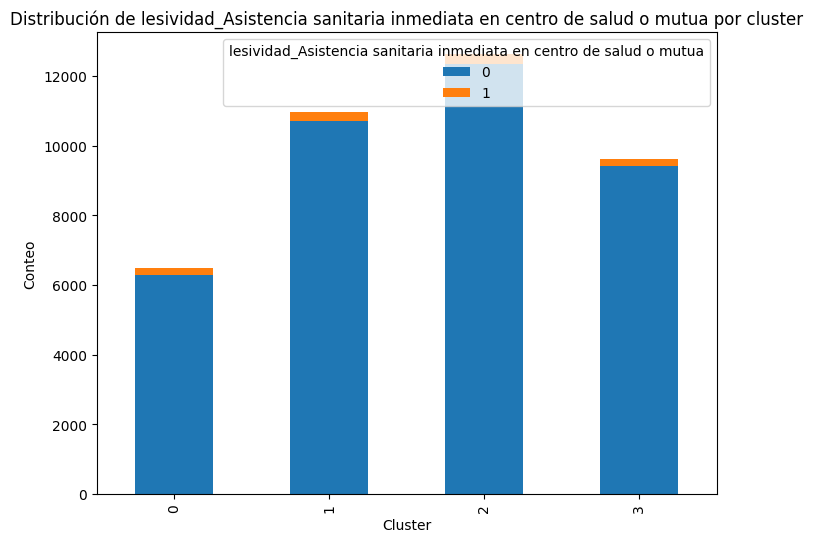


Distribución en porcentaje de lesividad_Asistencia sanitaria sólo en el lugar del accidente por cluster:
lesividad_Asistencia sanitaria sólo en el lugar del accidente          0  \
cluster                                                                    
0                                                              88.628659   
1                                                              87.744292   
2                                                              87.873031   
3                                                              88.739863   

lesividad_Asistencia sanitaria sólo en el lugar del accidente          1  
cluster                                                                   
0                                                              11.371341  
1                                                              12.255708  
2                                                              12.126969  
3                                                             

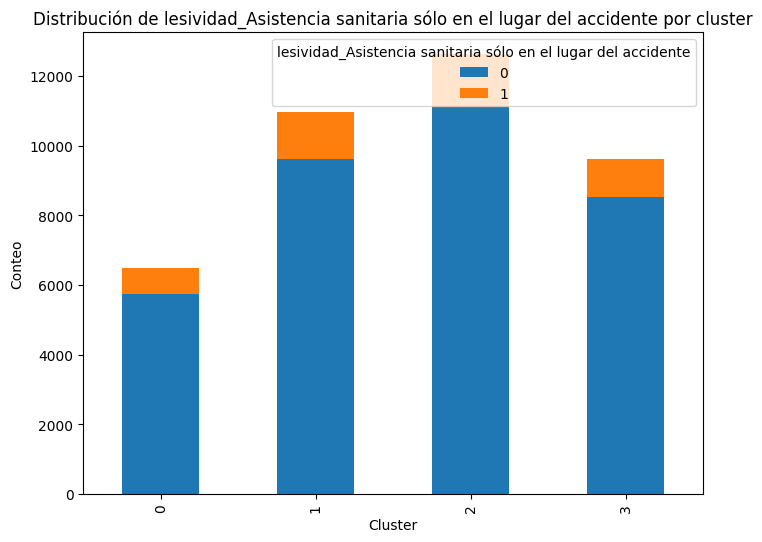


Distribución en porcentaje de lesividad_Atención en urgencias sin posterior ingreso por cluster:
lesividad_Atención en urgencias sin posterior ingreso          0         1
cluster                                                                   
0                                                      97.395994  2.604006
1                                                      97.013699  2.986301
2                                                      97.451120  2.548880
3                                                      97.016012  2.983988


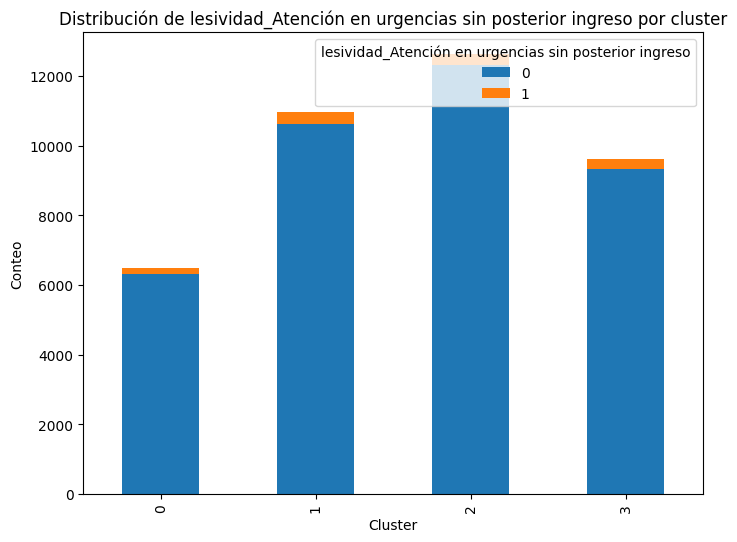


Distribución en porcentaje de lesividad_Fallecido 24 horas por cluster:
lesividad_Fallecido 24 horas          0         1
cluster                                          
0                             99.938367  0.061633
1                             99.963470  0.036530
2                             99.920842  0.079158
3                             99.937617  0.062383


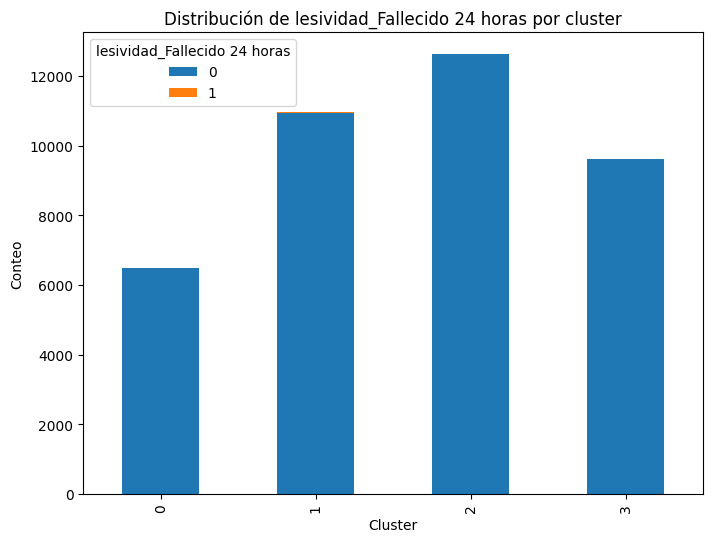


Distribución en porcentaje de lesividad_Ingreso inferior o igual a 24 horas por cluster:
lesividad_Ingreso inferior o igual a 24 horas          0         1
cluster                                                           
0                                              96.009245  3.990755
1                                              96.127854  3.872146
2                                              96.382490  3.617510
3                                              96.464962  3.535038


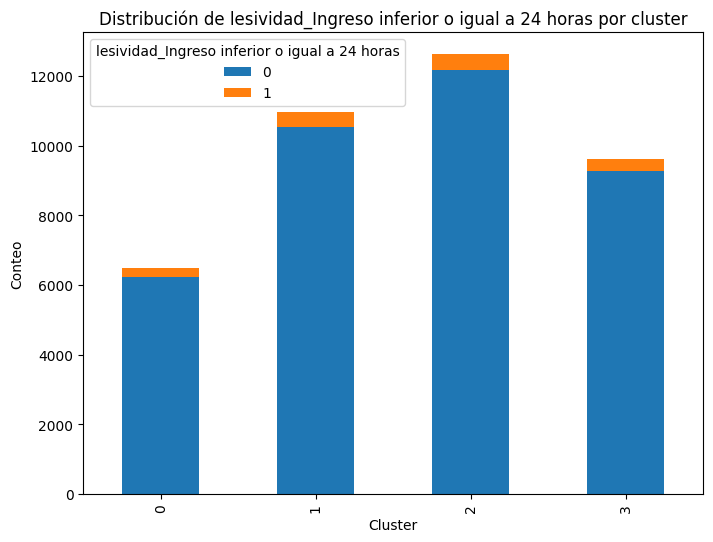


Distribución en porcentaje de lesividad_Ingreso superior a 24 horas por cluster:
lesividad_Ingreso superior a 24 horas          0         1
cluster                                                   
0                                      98.597843  1.402157
1                                      98.949772  1.050228
2                                      98.891791  1.108209
3                                      98.700354  1.299646


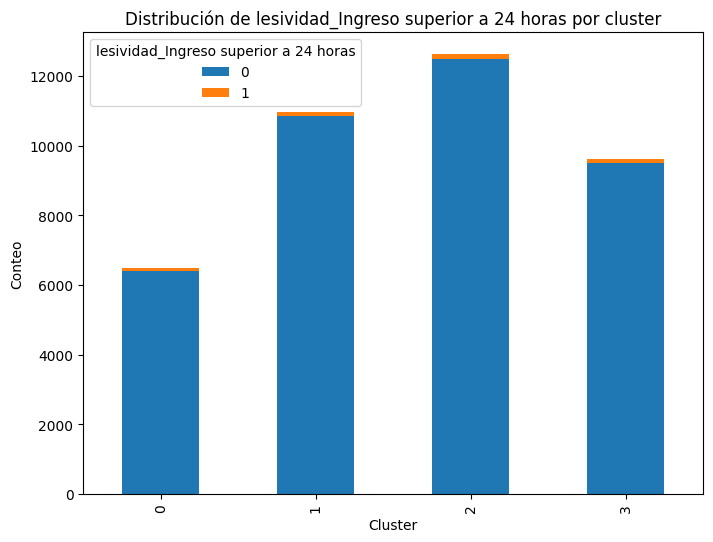


Distribución en porcentaje de lesividad_Sin asistencia sanitaria por cluster:
lesividad_Sin asistencia sanitaria          0          1
cluster                                                 
0                                   23.528505  76.471495
1                                   23.543379  76.456621
2                                   23.019077  76.980923
3                                   22.405906  77.594094


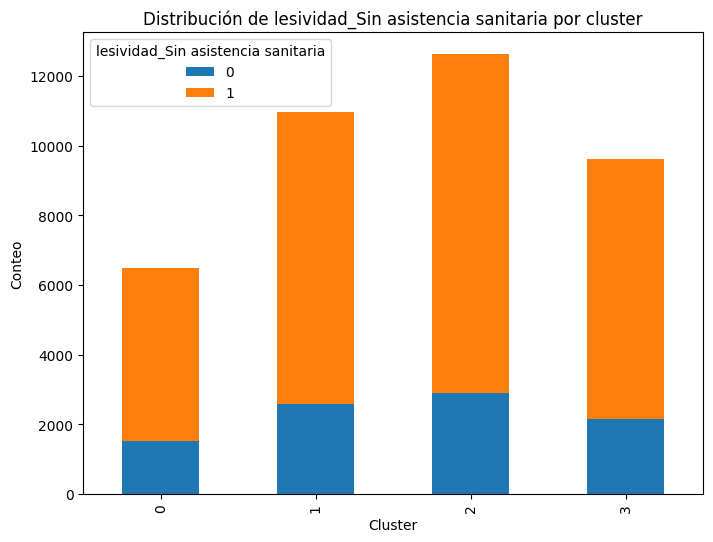

In [70]:
lesividad_columns = [col for col in df.columns if col.startswith('lesividad_')]

for lesividad in lesividad_columns:
    ctab = pd.crosstab(df['cluster'], df[lesividad])
    ctab_percentage = pd.crosstab(df['cluster'], df[lesividad], normalize='index') * 100

    print(f"\nDistribución en porcentaje de {lesividad} por cluster:")
    print(ctab_percentage)
    
    ctab.plot(kind='bar', stacked=True, figsize=(8,6))
    plt.title(f"Distribución de {lesividad} por cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Conteo")
    plt.show()

Respecto a esta variable, apenas hay cambios en ningún tipo de lesividad. Está distribuida equitativamente en todos los clusters.

##### tipo_vehiculo


Distribución en porcentaje de tipo_vehiculo_Autobus EMT por cluster:
tipo_vehiculo_Autobus EMT           0         1
cluster                                        
0                           99.845917  0.154083
1                           99.954338  0.045662
2                           99.984168  0.015832
3                          100.000000  0.000000


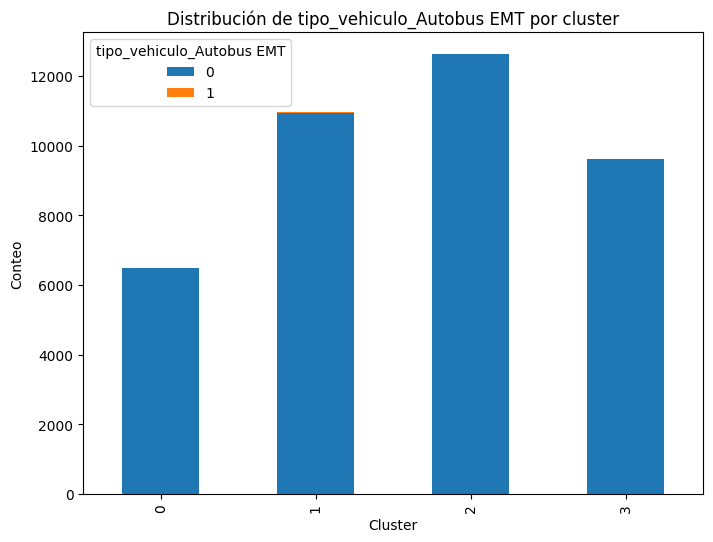


Distribución en porcentaje de tipo_vehiculo_Autobús por cluster:
tipo_vehiculo_Autobús          0         1
cluster                                   
0                      97.288136  2.711864
1                      96.155251  3.844749
2                      96.398322  3.601678
3                      97.806197  2.193803


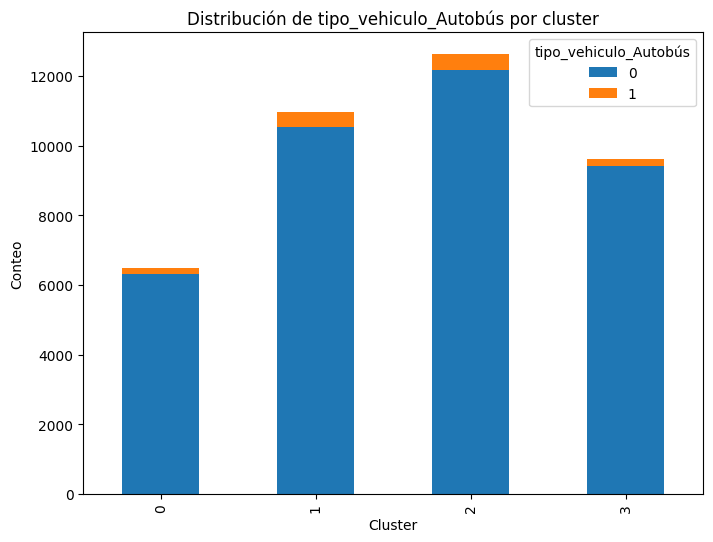


Distribución en porcentaje de tipo_vehiculo_Autocaravana por cluster:
tipo_vehiculo_Autocaravana          0         1
cluster                                        
0                           99.969183  0.030817
1                           99.972603  0.027397
2                           99.976253  0.023747
3                           99.968808  0.031192


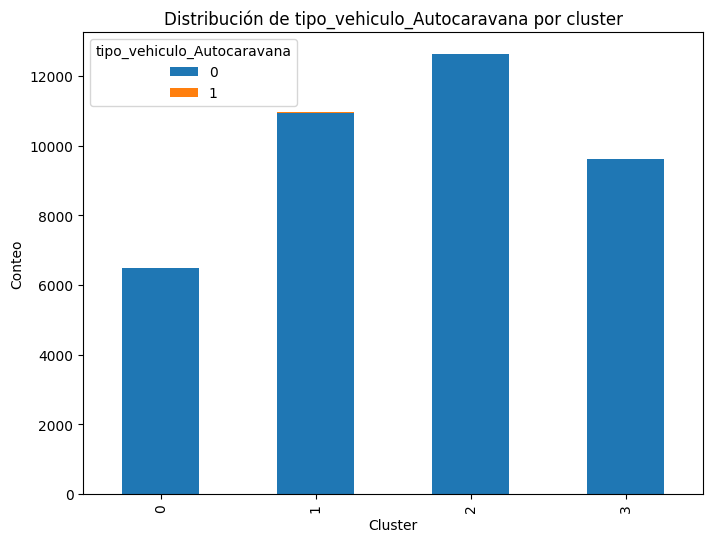


Distribución en porcentaje de tipo_vehiculo_Bicicleta por cluster:
tipo_vehiculo_Bicicleta          0         1
cluster                                     
0                        98.382126  1.617874
1                        98.420091  1.579909
2                        98.622655  1.377345
3                        97.733417  2.266583


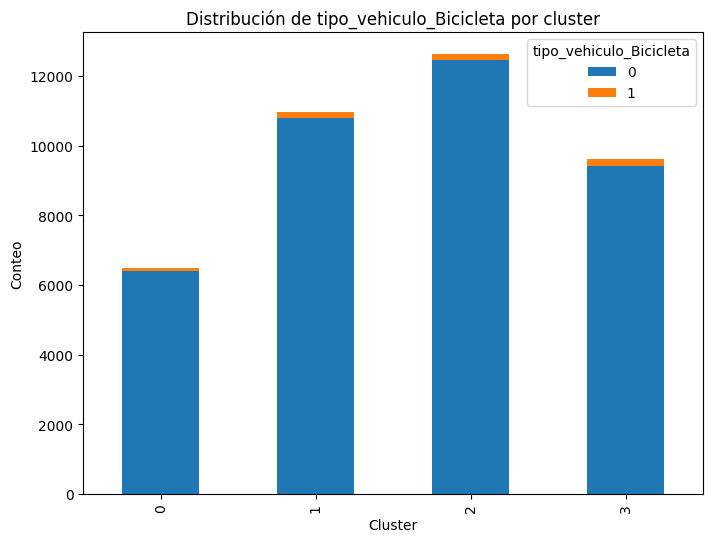


Distribución en porcentaje de tipo_vehiculo_Bicicleta EPAC (pedaleo asistido) por cluster:
tipo_vehiculo_Bicicleta EPAC (pedaleo asistido)          0         1
cluster                                                             
0                                                99.568567  0.431433
1                                                99.442922  0.557078
2                                                99.477559  0.522441
3                                                99.417758  0.582242


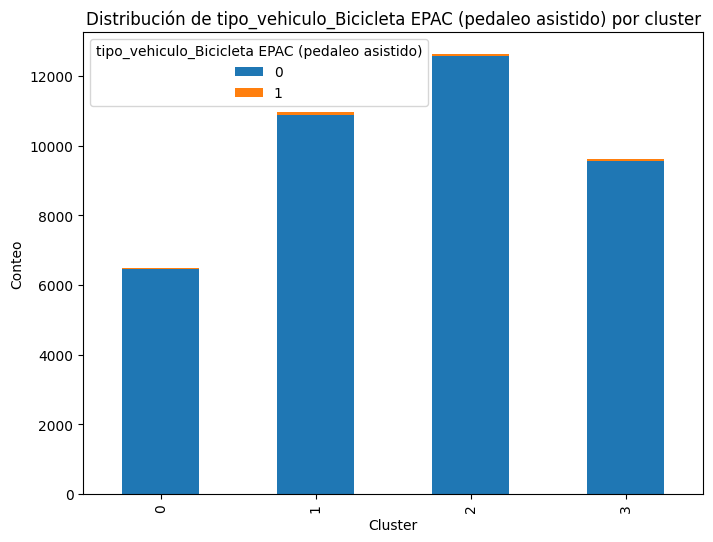


Distribución en porcentaje de tipo_vehiculo_Camión rígido por cluster:
tipo_vehiculo_Camión rígido          0         1
cluster                                         
0                            95.993837  4.006163
1                            97.972603  2.027397
2                            97.253226  2.746774
3                            98.606779  1.393221


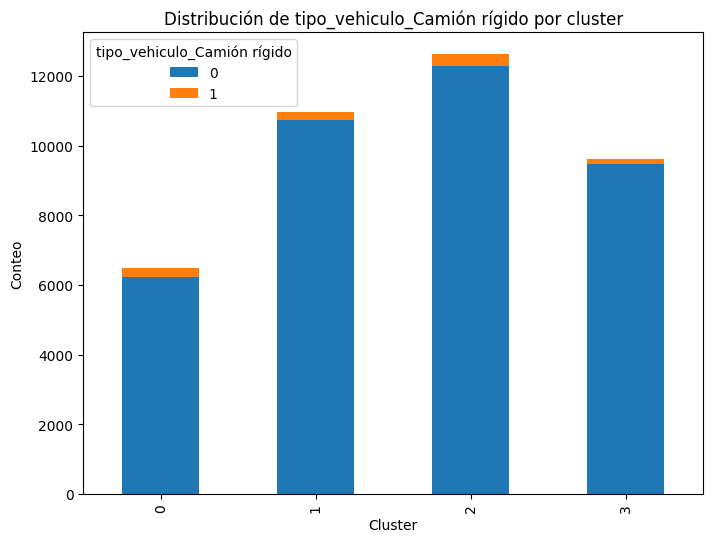


Distribución en porcentaje de tipo_vehiculo_Ciclo por cluster:
tipo_vehiculo_Ciclo          0         1
cluster                                 
0                    99.984592  0.015408
1                    99.963470  0.036530
2                    99.960421  0.039579
3                    99.968808  0.031192


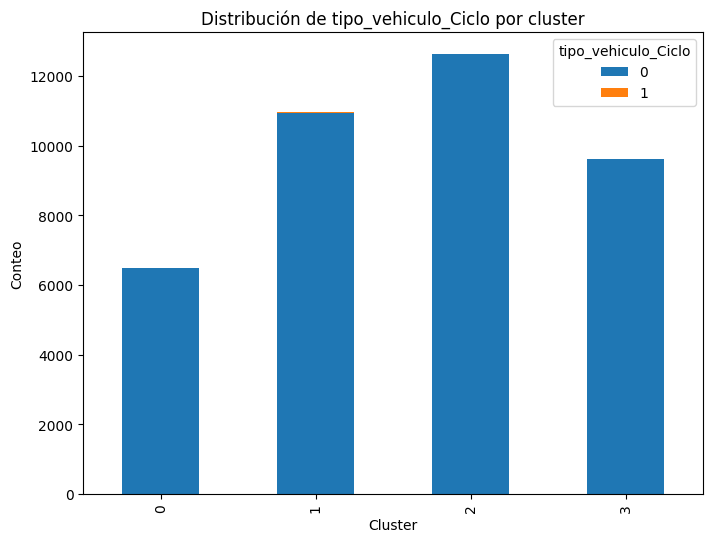


Distribución en porcentaje de tipo_vehiculo_Ciclomotor por cluster:
tipo_vehiculo_Ciclomotor          0         1
cluster                                      
0                         99.429892  0.570108
1                         98.986301  1.013699
2                         99.097602  0.902398
3                         98.700354  1.299646


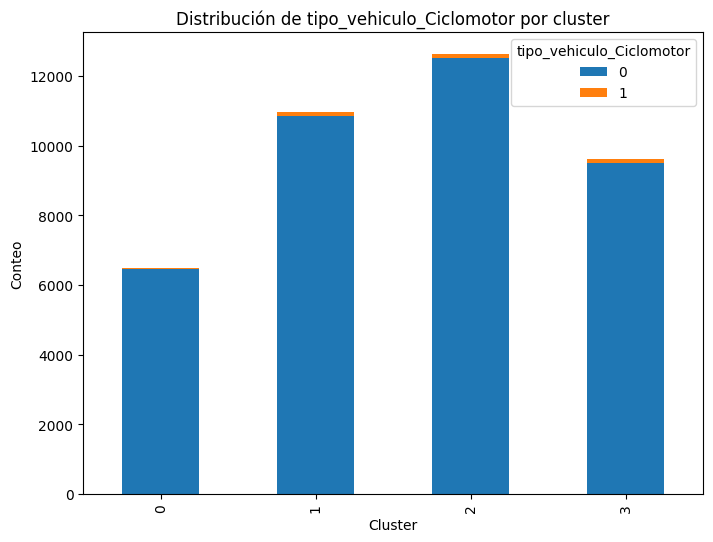


Distribución en porcentaje de tipo_vehiculo_Cuadriciclo ligero por cluster:
tipo_vehiculo_Cuadriciclo ligero          0         1
cluster                                              
0                                 99.938367  0.061633
1                                 99.890411  0.109589
2                                 99.936674  0.063326
3                                 99.916823  0.083177


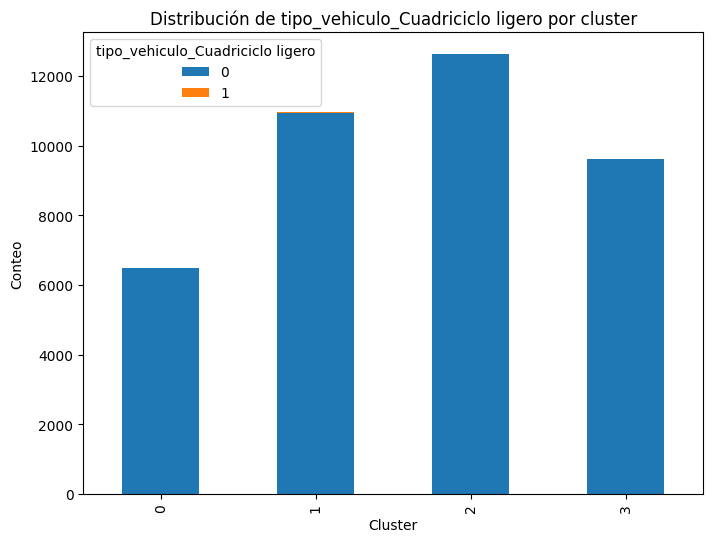


Distribución en porcentaje de tipo_vehiculo_Cuadriciclo no ligero por cluster:
tipo_vehiculo_Cuadriciclo no ligero          0         1
cluster                                                 
0                                    99.969183  0.030817
1                                    99.981735  0.018265
2                                    99.968337  0.031663
3                                    99.958411  0.041589


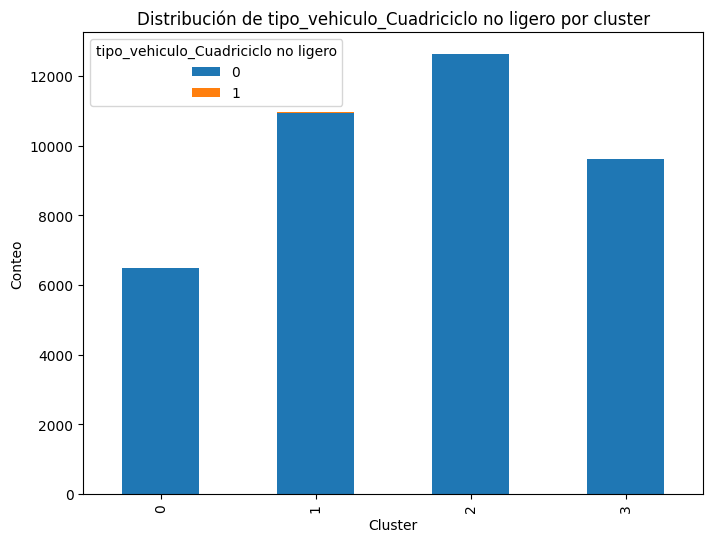


Distribución en porcentaje de tipo_vehiculo_Furgoneta por cluster:
tipo_vehiculo_Furgoneta          0         1
cluster                                     
0                        91.032357  8.967643
1                        92.940639  7.059361
2                        93.263675  6.736325
3                        95.331670  4.668330


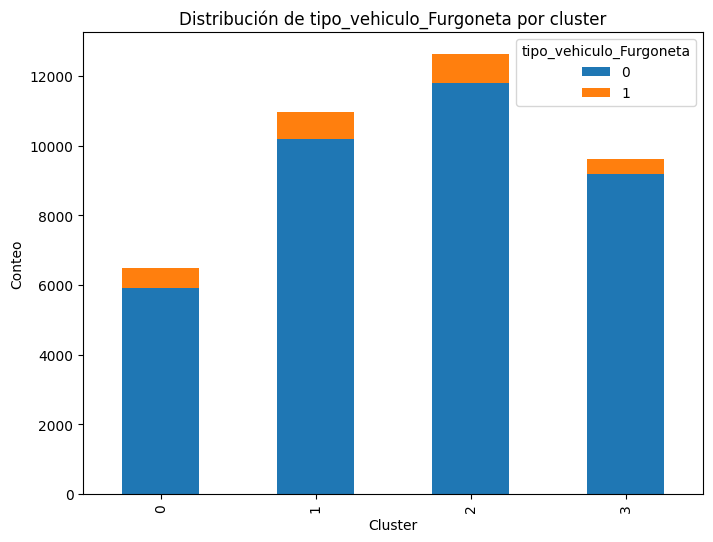


Distribución en porcentaje de tipo_vehiculo_Maquinaria de obras por cluster:
tipo_vehiculo_Maquinaria de obras          0         1
cluster                                               
0                                  99.244992  0.755008
1                                  99.671233  0.328767
2                                  99.667537  0.332463
3                                  99.760865  0.239135


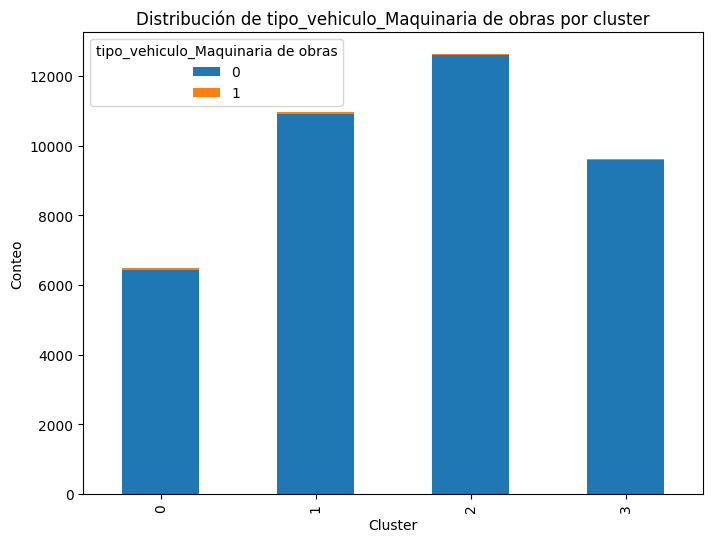


Distribución en porcentaje de tipo_vehiculo_Motocicleta > 125cc por cluster:
tipo_vehiculo_Motocicleta > 125cc          0         1
cluster                                               
0                                  95.608629  4.391371
1                                  96.018265  3.981735
2                                  95.978786  4.021214
3                                  97.525473  2.474527


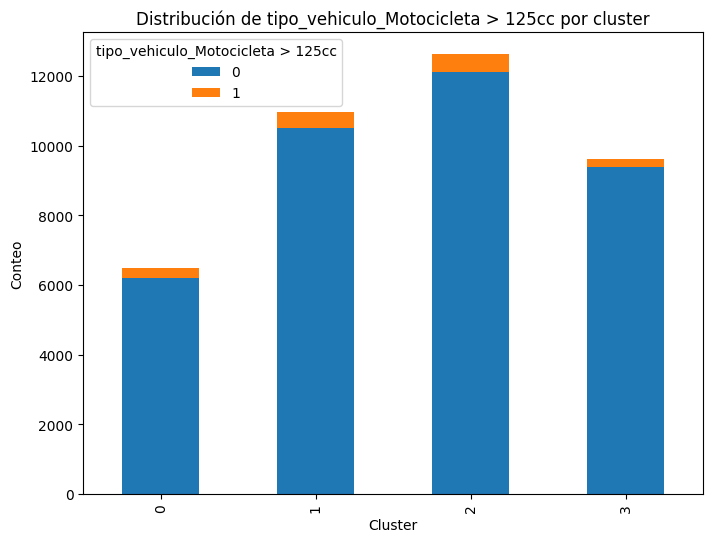


Distribución en porcentaje de tipo_vehiculo_Motocicleta hasta 125cc por cluster:
tipo_vehiculo_Motocicleta hasta 125cc          0         1
cluster                                                   
0                                      93.605547  6.394453
1                                      92.520548  7.479452
2                                      93.200348  6.799652
3                                      94.052818  5.947182


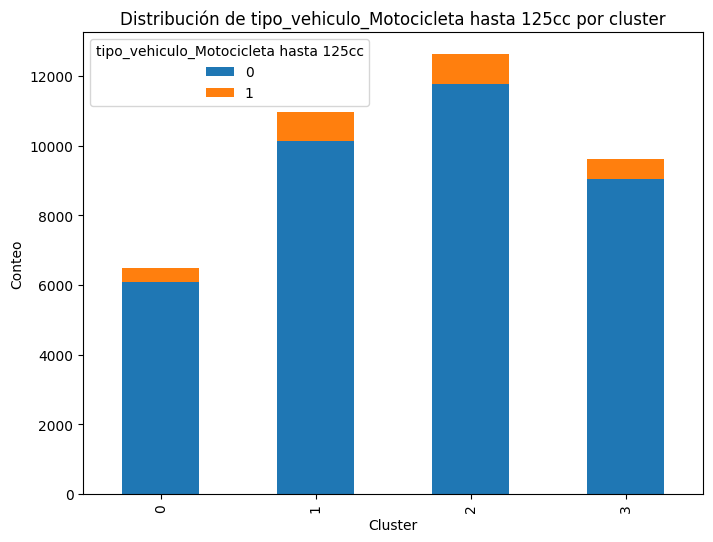


Distribución en porcentaje de tipo_vehiculo_Otros vehículos con motor por cluster:
tipo_vehiculo_Otros vehículos con motor          0         1
cluster                                                     
0                                        99.522342  0.477658
1                                        99.680365  0.319635
2                                        99.564632  0.435368
3                                        99.771262  0.228738


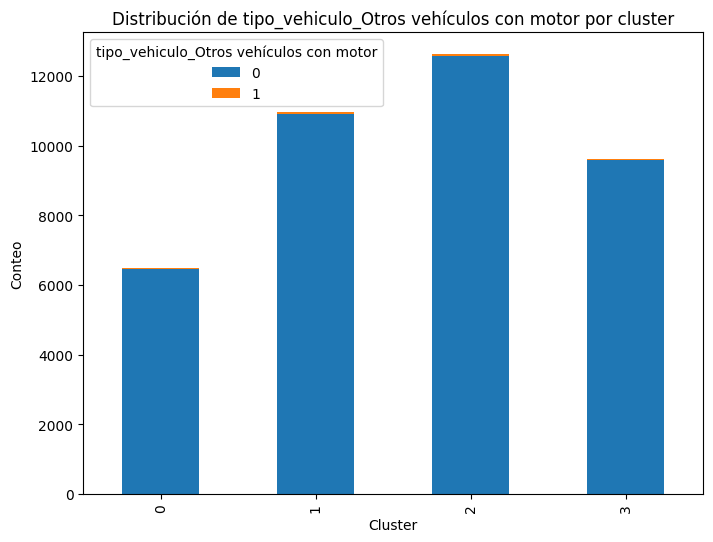


Distribución en porcentaje de tipo_vehiculo_Otros vehículos sin motor por cluster:
tipo_vehiculo_Otros vehículos sin motor          0         1
cluster                                                     
0                                        99.984592  0.015408
1                                        99.945205  0.054795
2                                        99.968337  0.031663
3                                        99.979206  0.020794


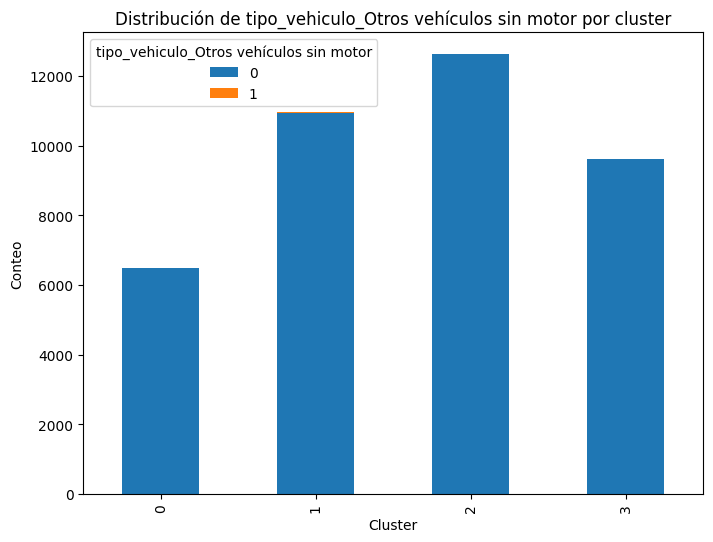


Distribución en porcentaje de tipo_vehiculo_Todo terreno por cluster:
tipo_vehiculo_Todo terreno          0         1
cluster                                        
0                           98.228043  1.771957
1                           98.146119  1.853881
2                           98.234782  1.765218
3                           98.326055  1.673945


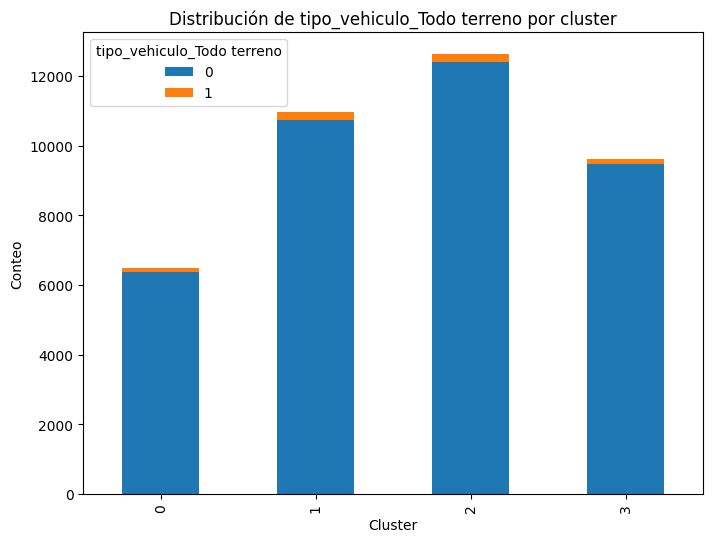


Distribución en porcentaje de tipo_vehiculo_Tractocamión por cluster:
tipo_vehiculo_Tractocamión          0         1
cluster                                        
0                           99.090909  0.909091
1                           99.461187  0.538813
2                           99.556717  0.443283
3                           99.875234  0.124766


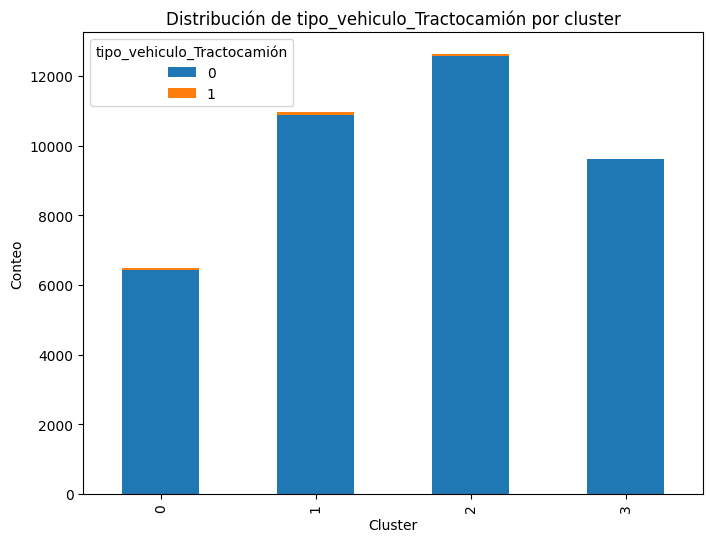


Distribución en porcentaje de tipo_vehiculo_Turismo por cluster:
tipo_vehiculo_Turismo          0          1
cluster                                    
0                      34.961479  65.038521
1                      32.977169  67.022831
2                      31.884746  68.115254
3                      25.525057  74.474943


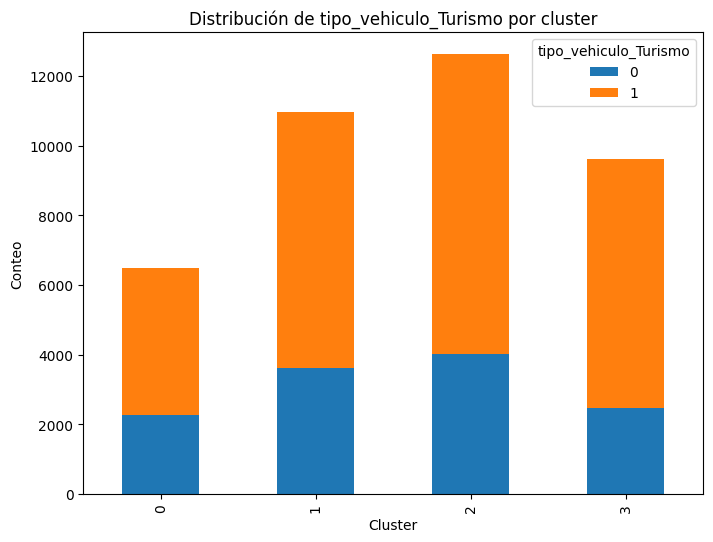


Distribución en porcentaje de tipo_vehiculo_VMU eléctrico por cluster:
tipo_vehiculo_VMU eléctrico          0         1
cluster                                         
0                            98.828968  1.171032
1                            98.246575  1.753425
2                            98.432676  1.567324
3                            97.941360  2.058640


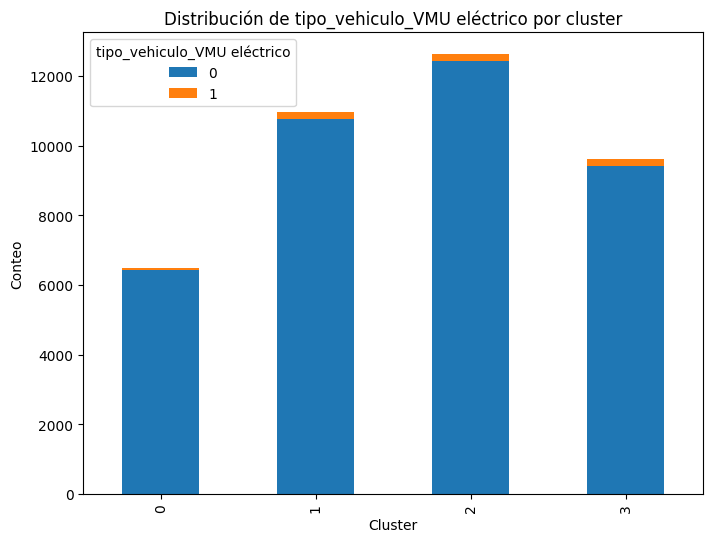


Distribución en porcentaje de tipo_vehiculo_Vehículo articulado por cluster:
tipo_vehiculo_Vehículo articulado          0         1
cluster                                               
0                                  99.522342  0.477658
1                                  99.652968  0.347032
2                                  99.572548  0.427452
3                                  99.833645  0.166355


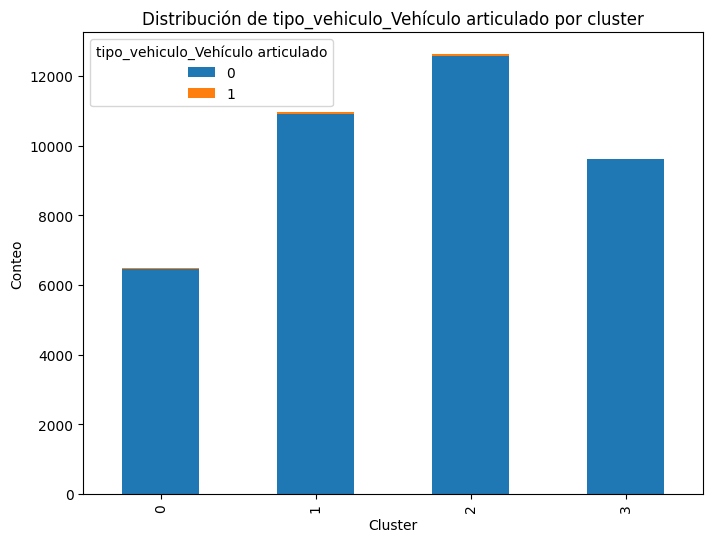

In [71]:
vehiculo_columns = [col for col in df.columns if col.startswith('tipo_vehiculo_')]

for vehiculo in vehiculo_columns:
    ctab = pd.crosstab(df['cluster'], df[vehiculo])
    ctab_percentage = pd.crosstab(df['cluster'], df[vehiculo], normalize='index') * 100

    print(f"\nDistribución en porcentaje de {vehiculo} por cluster:")
    print(ctab_percentage)
    
    ctab.plot(kind='bar', stacked=True, figsize=(8,6))
    plt.title(f"Distribución de {vehiculo} por cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Conteo")
    plt.show()

Aquí vuelve a ocurrir lo mismo aunque con el turismo, varía ligeramente la distribución, teniendo un 65% en el cluster 0 y un 74,47% en el cluster 3

##### accidentes en cruce

In [81]:
cruce_cluster = pd.crosstab(df['cluster'], df['es_cruce'])
ctab_percentage = pd.crosstab(df['cluster'], df['es_cruce'], normalize='index') * 100



Distribución en porcentaje de cruces por cluster:
es_cruce          0          1
cluster                       
0         54.252696  45.747304
1         52.237443  47.762557
2         54.310140  45.689860
3         53.119152  46.880848


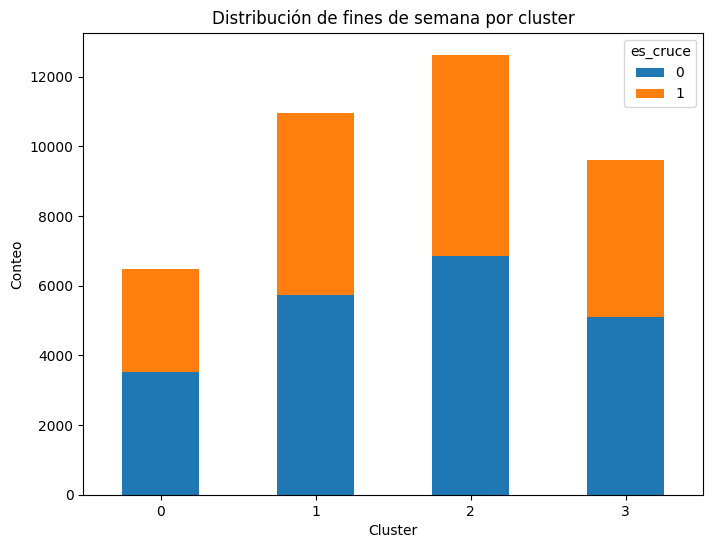

In [82]:
print(f"\nDistribución en porcentaje de cruces por cluster:")
print(ctab_percentage)
cruce_cluster.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Distribución de fines de semana por cluster")
plt.xlabel("Cluster")
plt.ylabel("Conteo")
plt.xticks(rotation=0)
plt.show()

Esta variable está distribuida equitativamente en todos los clusters.

##### rango_edad


Distribución en porcentaje de rango_edad_cod por cluster:
rango_edad_cod        0         1         2         3         4         5   \
cluster                                                                      
0               0.724191  0.523883  0.785824  0.801233  2.465331  5.778120   
1               1.132420  0.922374  1.050228  1.123288  3.050228  6.821918   
2               1.013219  0.625346  0.965725  0.941977  3.720415  7.108367   
3               0.998129  0.748596  1.039717  1.143689  4.585153  9.253483   

rango_edad_cod         6          7          8          9          10  \
cluster                                                                 
0                9.707242  10.493066  10.755008  11.186441  12.881356   
1               10.602740  10.739726  10.913242  11.004566  11.589041   
2               10.702129  11.145413  10.915855  10.274677  11.501623   
3               12.247869  11.083385   9.970888  10.573924  10.106051   

rango_edad_cod         11        

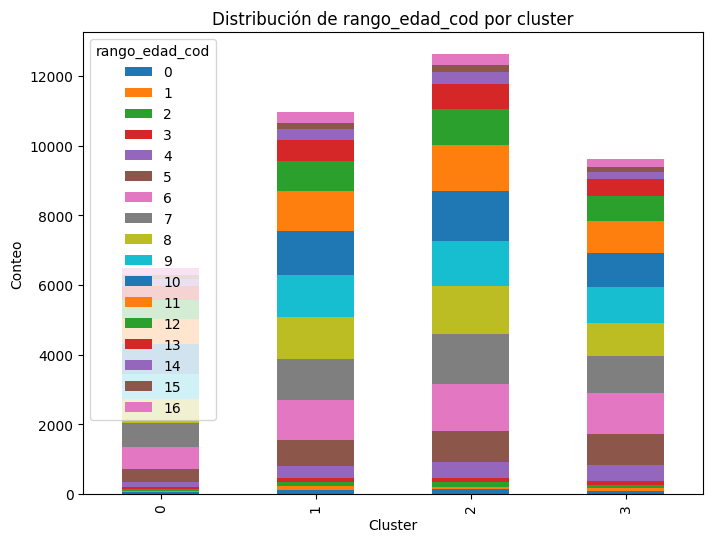


Distribución en porcentaje de rango_edad_De 10 a 14 años por cluster:
rango_edad_De 10 a 14 años          0         1
cluster                                        
0                           99.214176  0.785824
1                           98.949772  1.050228
2                           99.034275  0.965725
3                           98.960283  1.039717


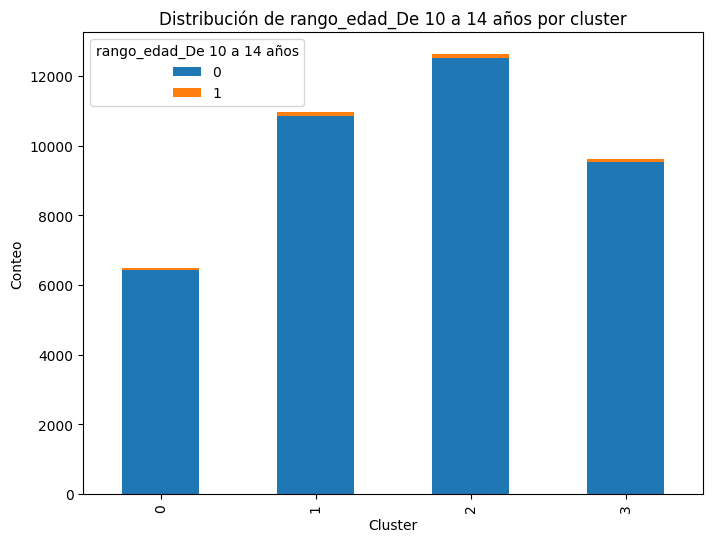


Distribución en porcentaje de rango_edad_De 15 a 17 años por cluster:
rango_edad_De 15 a 17 años          0         1
cluster                                        
0                           99.198767  0.801233
1                           98.876712  1.123288
2                           99.058023  0.941977
3                           98.856311  1.143689


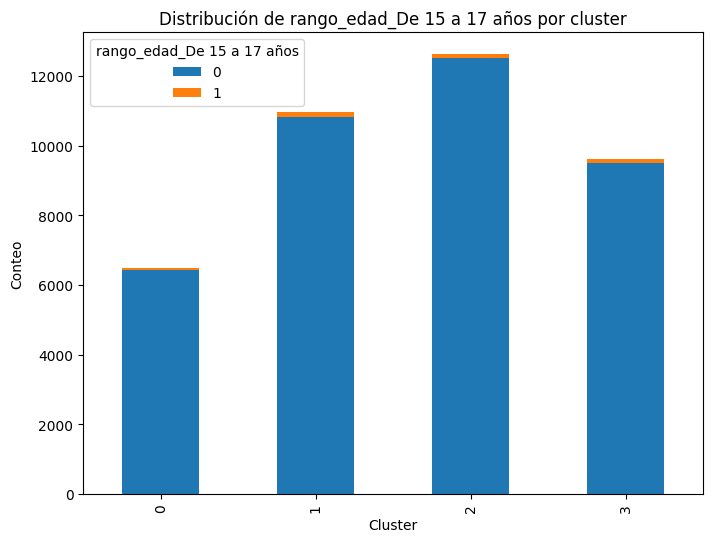


Distribución en porcentaje de rango_edad_De 18 a 20 años por cluster:
rango_edad_De 18 a 20 años          0         1
cluster                                        
0                           97.534669  2.465331
1                           96.949772  3.050228
2                           96.279585  3.720415
3                           95.414847  4.585153


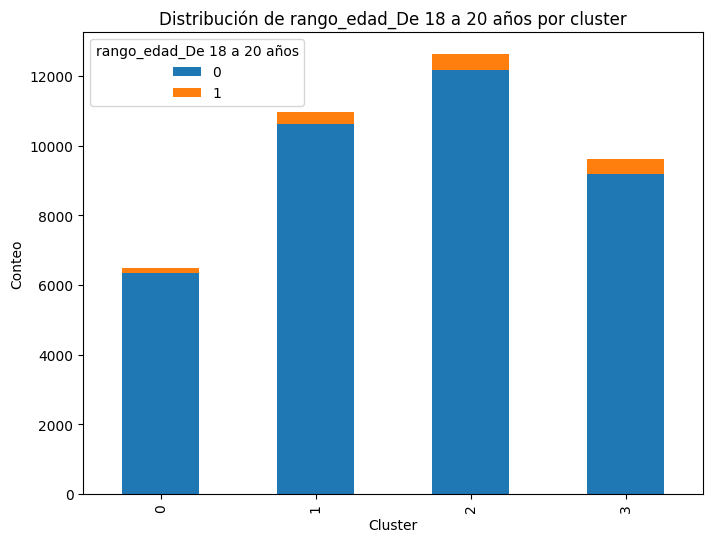


Distribución en porcentaje de rango_edad_De 21 a 24 años por cluster:
rango_edad_De 21 a 24 años          0         1
cluster                                        
0                           94.221880  5.778120
1                           93.178082  6.821918
2                           92.891633  7.108367
3                           90.746517  9.253483


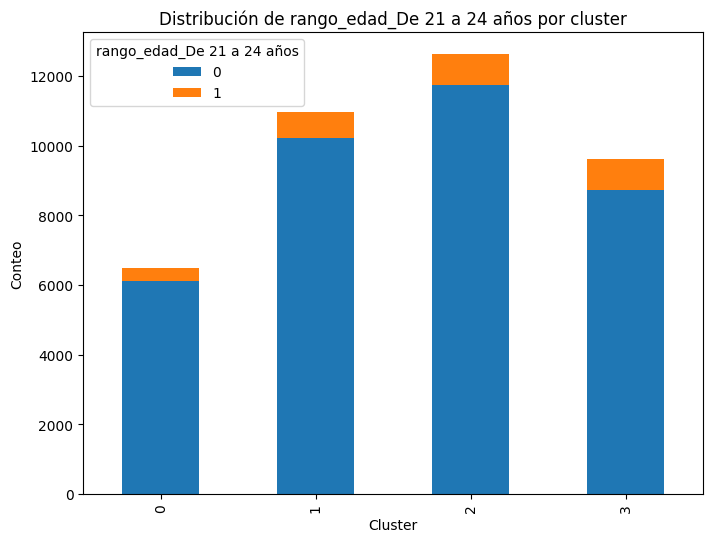


Distribución en porcentaje de rango_edad_De 25 a 29 años por cluster:
rango_edad_De 25 a 29 años          0          1
cluster                                         
0                           90.292758   9.707242
1                           89.397260  10.602740
2                           89.297871  10.702129
3                           87.752131  12.247869


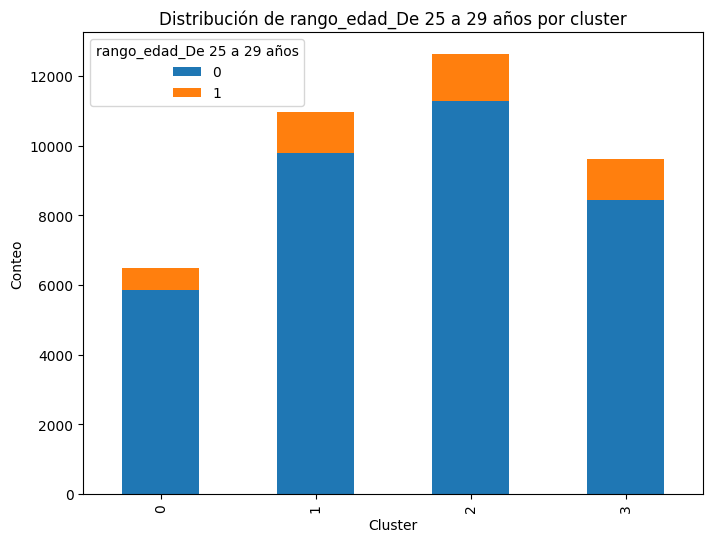


Distribución en porcentaje de rango_edad_De 30 a 34 años por cluster:
rango_edad_De 30 a 34 años          0          1
cluster                                         
0                           89.506934  10.493066
1                           89.260274  10.739726
2                           88.854587  11.145413
3                           88.916615  11.083385


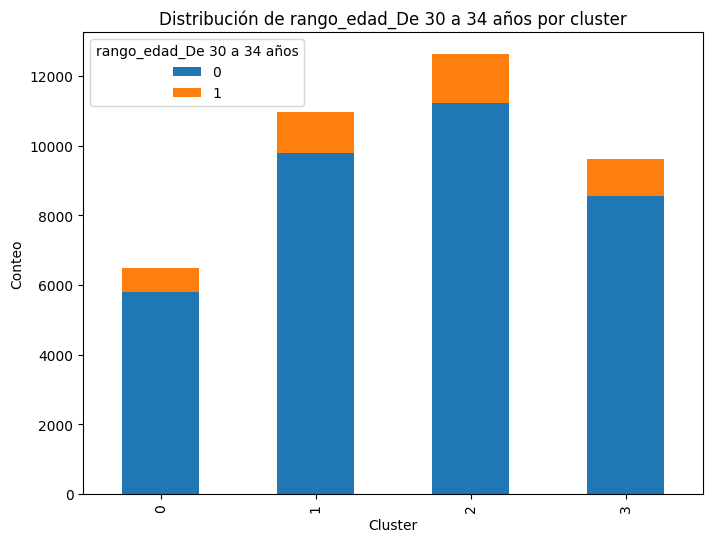


Distribución en porcentaje de rango_edad_De 35 a 39 años por cluster:
rango_edad_De 35 a 39 años          0          1
cluster                                         
0                           89.244992  10.755008
1                           89.086758  10.913242
2                           89.084145  10.915855
3                           90.029112   9.970888


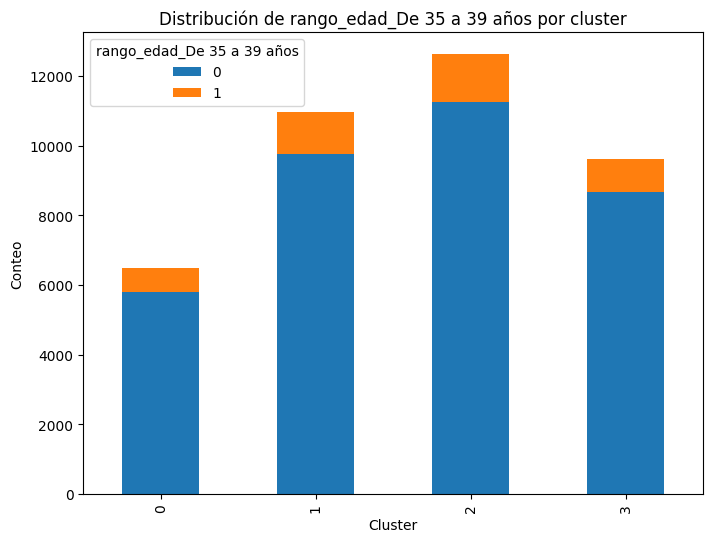


Distribución en porcentaje de rango_edad_De 40 a 44 años por cluster:
rango_edad_De 40 a 44 años          0          1
cluster                                         
0                           88.813559  11.186441
1                           88.995434  11.004566
2                           89.725323  10.274677
3                           89.426076  10.573924


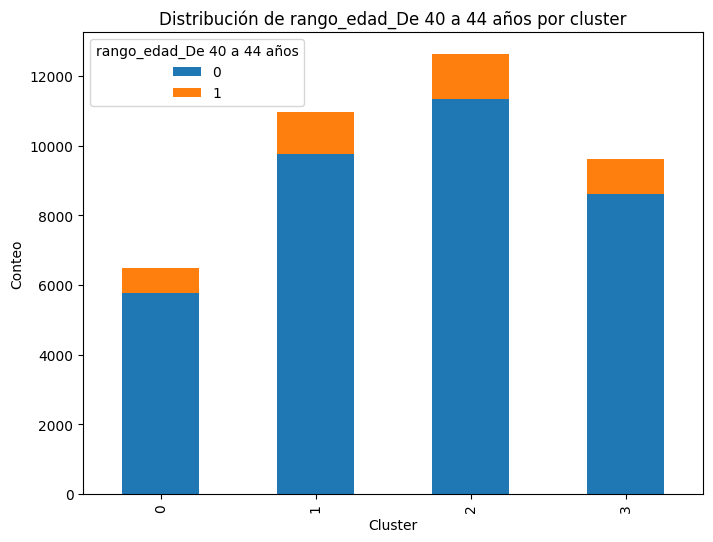


Distribución en porcentaje de rango_edad_De 45 a 49 años por cluster:
rango_edad_De 45 a 49 años          0          1
cluster                                         
0                           87.118644  12.881356
1                           88.410959  11.589041
2                           88.498377  11.501623
3                           89.893949  10.106051


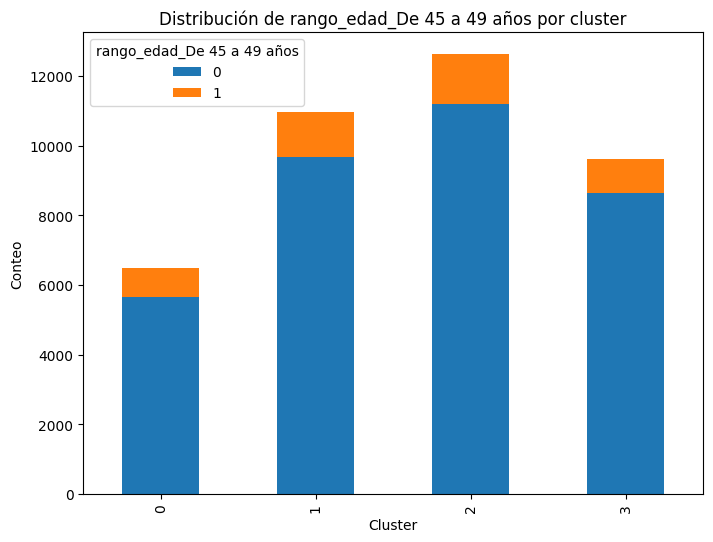


Distribución en porcentaje de rango_edad_De 50 a 54 años por cluster:
rango_edad_De 50 a 54 años          0          1
cluster                                         
0                           88.813559  11.186441
1                           89.589041  10.410959
2                           89.598670  10.401330
3                           90.351424   9.648576


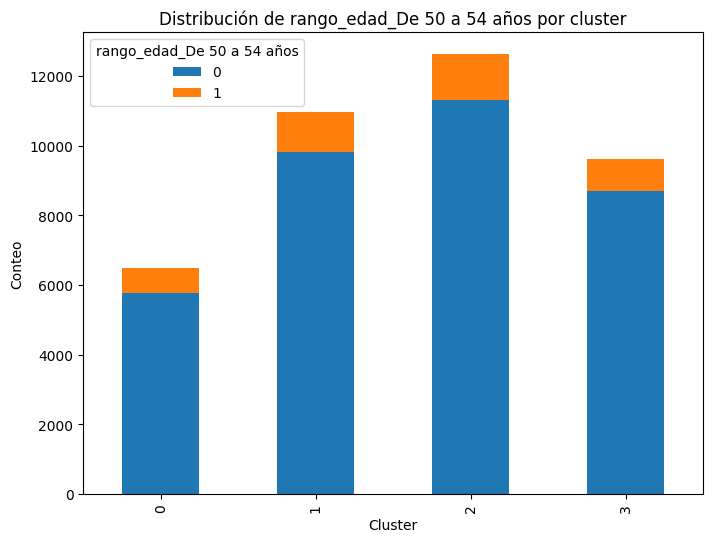


Distribución en porcentaje de rango_edad_De 55 a 59 años por cluster:
rango_edad_De 55 a 59 años          0         1
cluster                                        
0                           91.463790  8.536210
1                           92.036530  7.963470
2                           91.925908  8.074092
3                           92.524433  7.475567


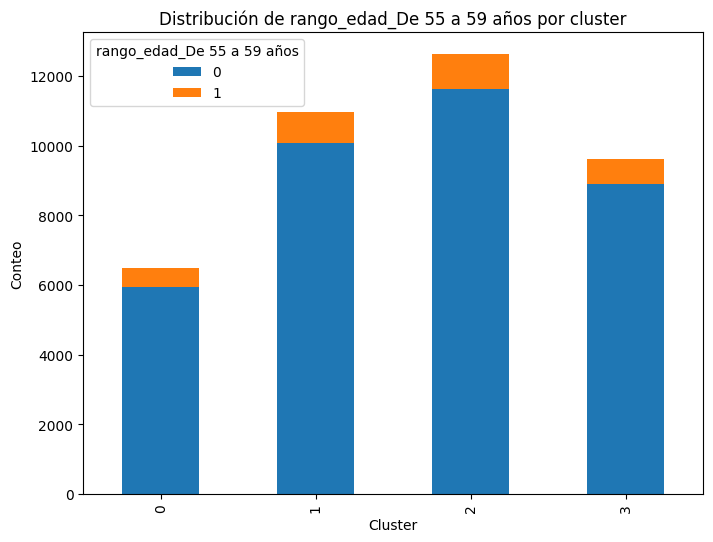


Distribución en porcentaje de rango_edad_De 6 a 9 años por cluster:
rango_edad_De 6 a 9 años          0         1
cluster                                      
0                         99.476117  0.523883
1                         99.077626  0.922374
2                         99.374654  0.625346
3                         99.251404  0.748596


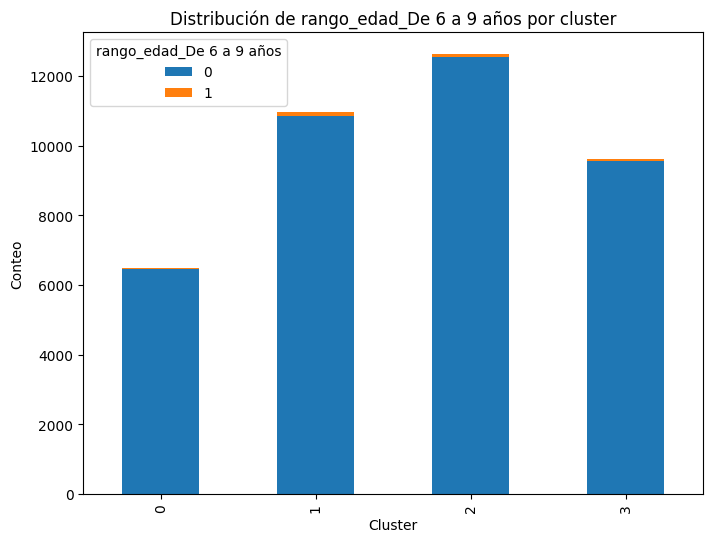


Distribución en porcentaje de rango_edad_De 60 a 64 años por cluster:
rango_edad_De 60 a 64 años          0         1
cluster                                        
0                           93.744222  6.255778
1                           94.502283  5.497717
2                           94.356052  5.643948
3                           95.019755  4.980245


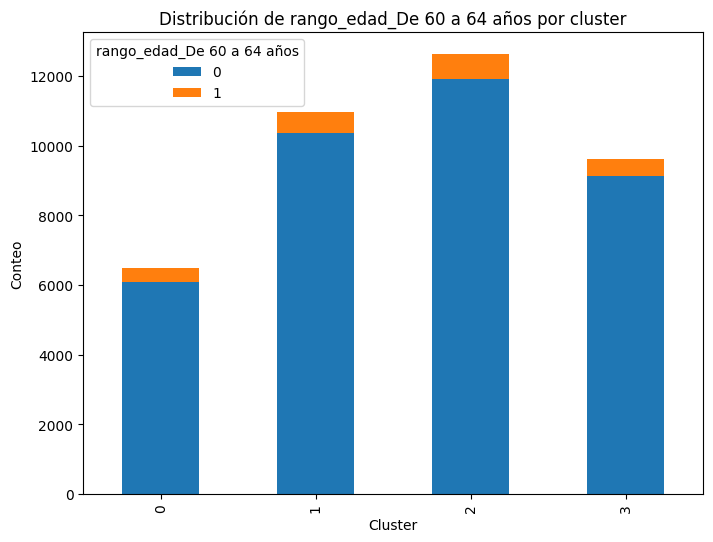


Distribución en porcentaje de rango_edad_De 65 a 69 años por cluster:
rango_edad_De 65 a 69 años          0         1
cluster                                        
0                           97.026194  2.973806
1                           97.232877  2.767123
2                           97.269057  2.730943
3                           97.629445  2.370555


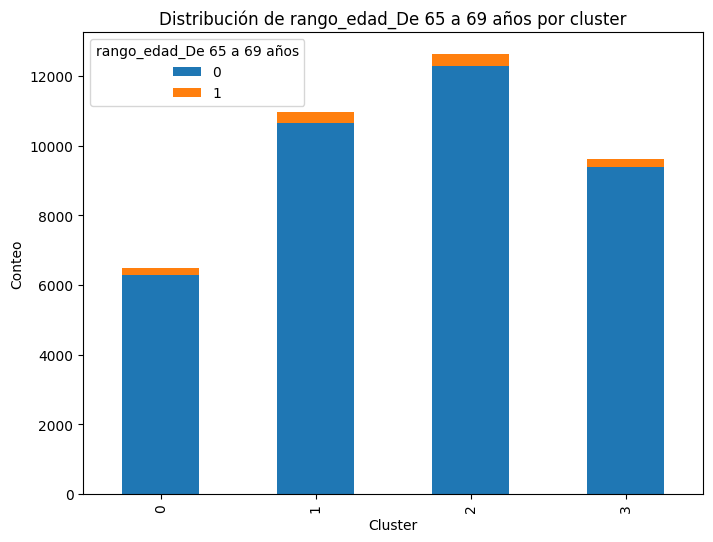


Distribución en porcentaje de rango_edad_De 70 a 74 años por cluster:
rango_edad_De 70 a 74 años          0         1
cluster                                        
0                           98.212635  1.787365
1                           98.447489  1.552511
2                           98.329771  1.670229
3                           98.565190  1.434810


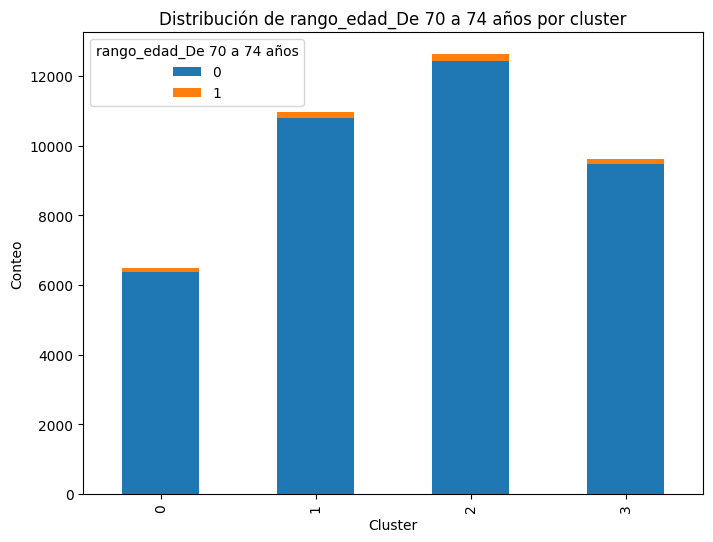


Distribución en porcentaje de rango_edad_Menor de 5 años por cluster:
rango_edad_Menor de 5 años          0         1
cluster                                        
0                           99.275809  0.724191
1                           98.867580  1.132420
2                           98.986781  1.013219
3                           99.001871  0.998129


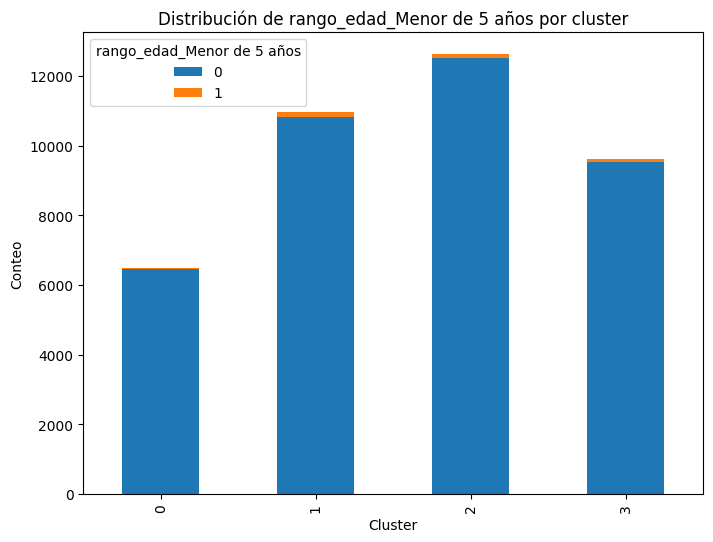


Distribución en porcentaje de rango_edad_Más de 74 años por cluster:
rango_edad_Más de 74 años          0         1
cluster                                       
0                          96.841294  3.158706
1                          97.141553  2.858447
2                          97.435289  2.564711
3                          97.660636  2.339364


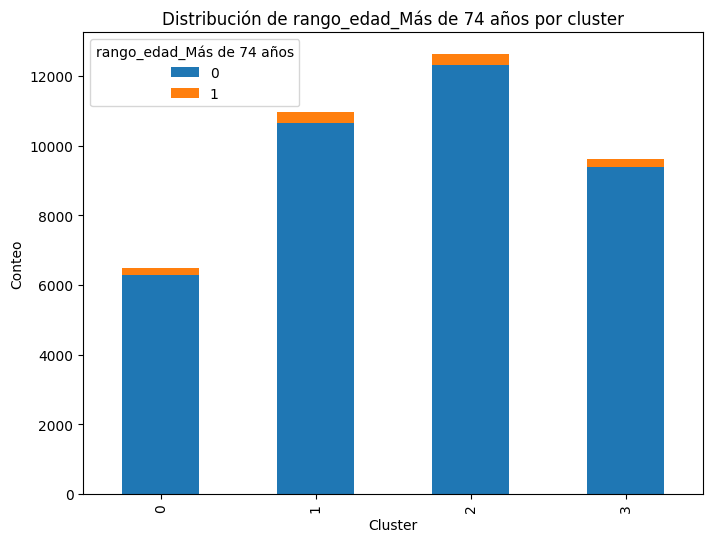

In [74]:
rango_edad_columns = [col for col in df.columns if col.startswith('rango_edad_')]

for rango_edad in rango_edad_columns:
    ctab = pd.crosstab(df['cluster'], df[rango_edad])
    ctab_percentage = pd.crosstab(df['cluster'], df[rango_edad], normalize='index') * 100

    print(f"\nDistribución en porcentaje de {rango_edad} por cluster:")
    print(ctab_percentage)
    
    ctab.plot(kind='bar', stacked=True, figsize=(8,6))
    plt.title(f"Distribución de {rango_edad} por cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Conteo")
    plt.show()

Volvemos a tener variables muy bien distribuidas. Donde más variaciones podemos encontrar es en el rango de edad de 25 a 29 años (entre el cluster 0 y el 3) y en el rango de 21 a 24 años.

##### Distrito


Distribución en porcentaje de distrito_ARGANZUELA por cluster:
distrito_ARGANZUELA          0         1
cluster                                 
0                    94.899846  5.100154
1                    94.091324  5.908676
2                    94.102747  5.897253
3                    95.487627  4.512373


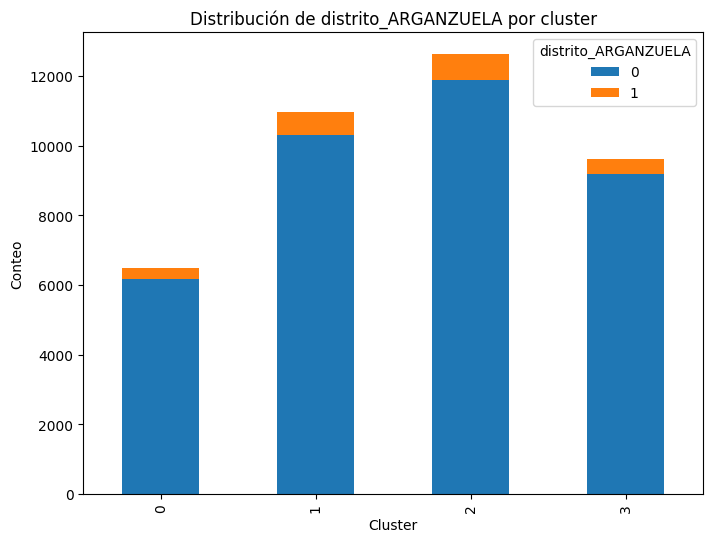


Distribución en porcentaje de distrito_BARAJAS por cluster:
distrito_BARAJAS          0         1
cluster                              
0                 98.181818  1.818182
1                 98.310502  1.689498
2                 98.068551  1.931449
3                 98.367644  1.632356


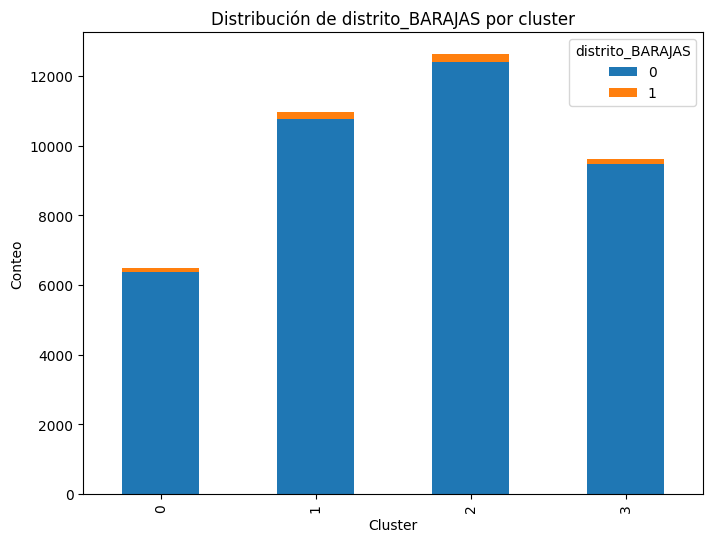


Distribución en porcentaje de distrito_CARABANCHEL por cluster:
distrito_CARABANCHEL          0         1
cluster                                  
0                     93.528505  6.471495
1                     93.552511  6.447489
2                     92.931212  7.068788
3                     91.609482  8.390518


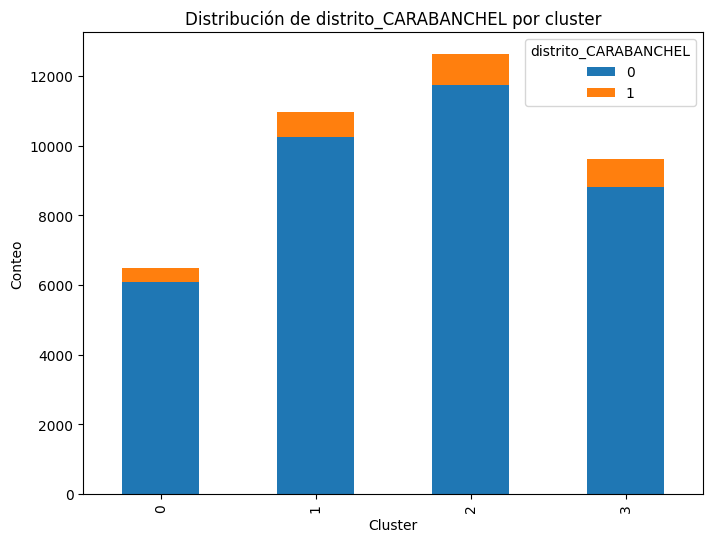


Distribución en porcentaje de distrito_CENTRO por cluster:
distrito_CENTRO          0         1
cluster                             
0                94.807396  5.192604
1                94.520548  5.479452
2                94.633104  5.366896
3                93.688917  6.311083


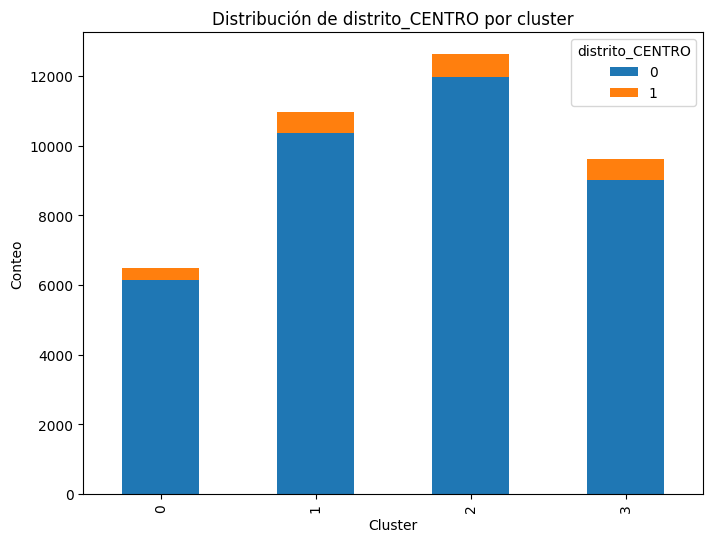


Distribución en porcentaje de distrito_CHAMARTÍN por cluster:
distrito_CHAMARTÍN          0         1
cluster                                
0                   92.573190  7.426810
1                   92.000000  8.000000
2                   93.342832  6.657168
3                   93.439384  6.560616


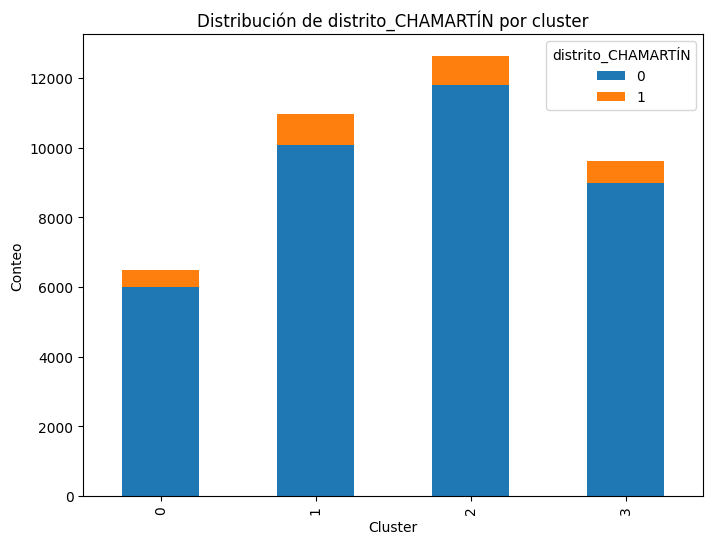


Distribución en porcentaje de distrito_CHAMBERÍ por cluster:
distrito_CHAMBERÍ          0         1
cluster                               
0                  95.439137  4.560863
1                  96.164384  3.835616
2                  95.717565  4.282435
3                  94.676648  5.323352


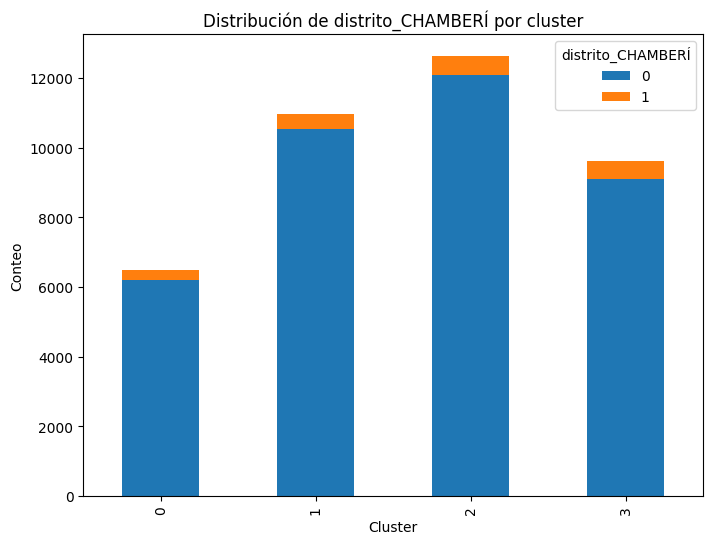


Distribución en porcentaje de distrito_CIUDAD LINEAL por cluster:
distrito_CIUDAD LINEAL          0         1
cluster                                    
0                       93.959938  6.040062
1                       93.936073  6.063927
2                       93.714874  6.285126
3                       94.052818  5.947182


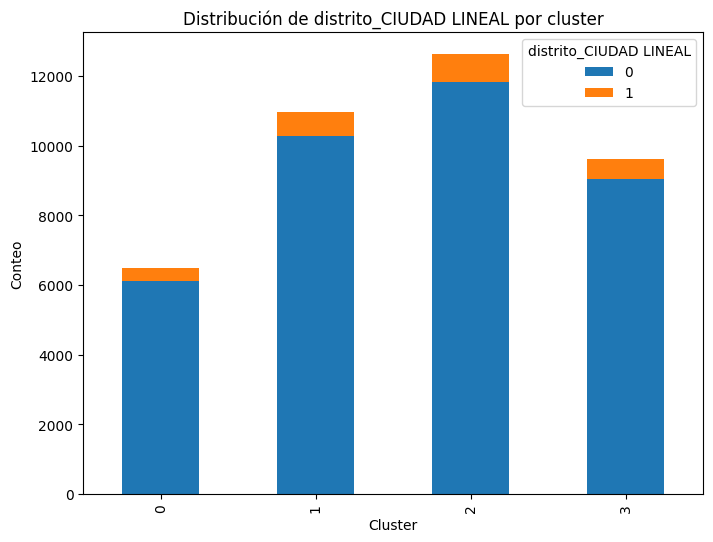


Distribución en porcentaje de distrito_FUENCARRAL-EL PARDO por cluster:
distrito_FUENCARRAL-EL PARDO          0         1
cluster                                          
0                             94.745763  5.254237
1                             95.105023  4.894977
2                             94.672683  5.327317
3                             95.186109  4.813891


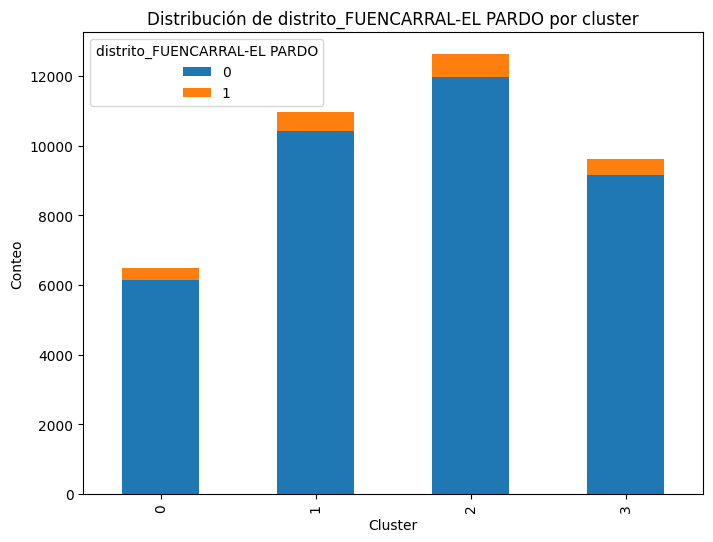


Distribución en porcentaje de distrito_HORTALEZA por cluster:
distrito_HORTALEZA          0         1
cluster                                
0                   96.795069  3.204931
1                   96.474886  3.525114
2                   95.654239  4.345761
3                   96.818465  3.181535


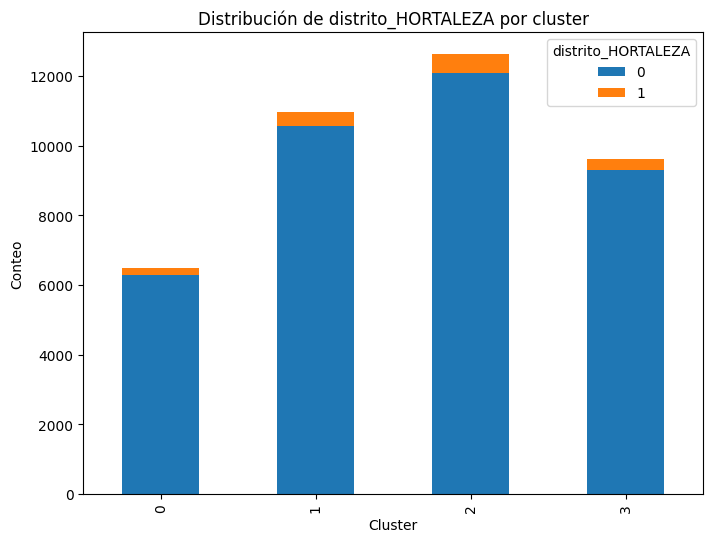


Distribución en porcentaje de distrito_LATINA por cluster:
distrito_LATINA          0         1
cluster                             
0                95.500770  4.499230
1                95.406393  4.593607
2                95.361355  4.638645
3                94.416719  5.583281


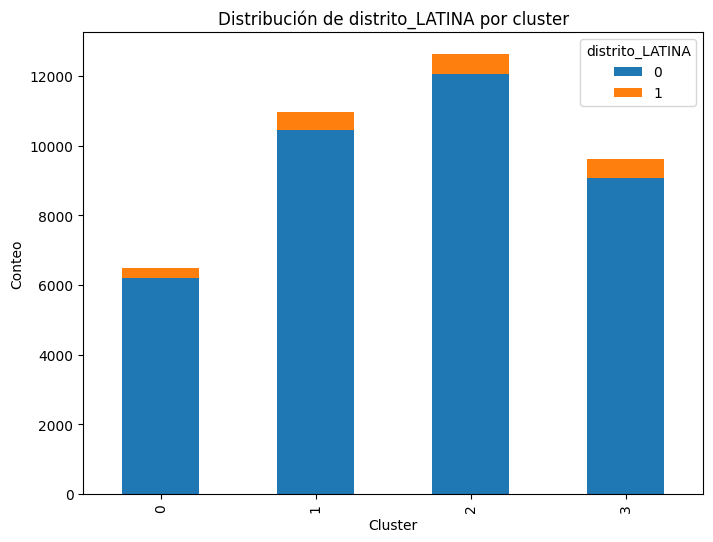


Distribución en porcentaje de distrito_MONCLOA-ARAVACA por cluster:
distrito_MONCLOA-ARAVACA          0         1
cluster                                      
0                         94.545455  5.454545
1                         95.132420  4.867580
2                         94.530199  5.469801
3                         95.861926  4.138074


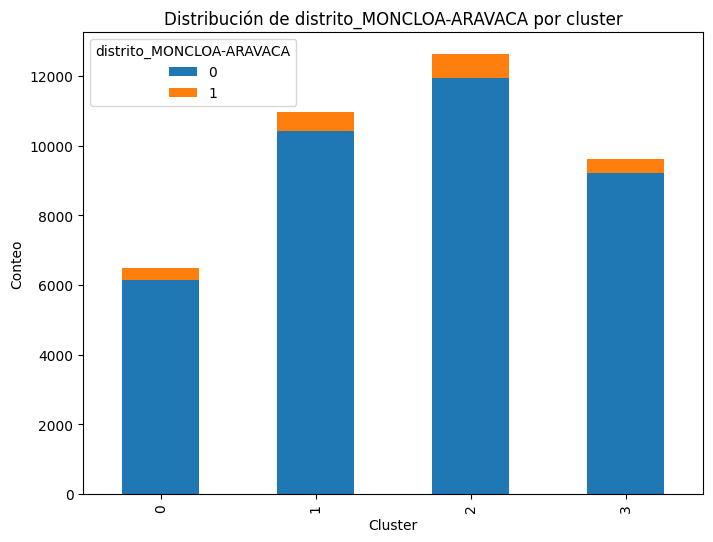


Distribución en porcentaje de distrito_MORATALAZ por cluster:
distrito_MORATALAZ          0         1
cluster                                
0                   96.486903  3.513097
1                   97.378995  2.621005
2                   97.071163  2.928837
3                   97.920566  2.079434


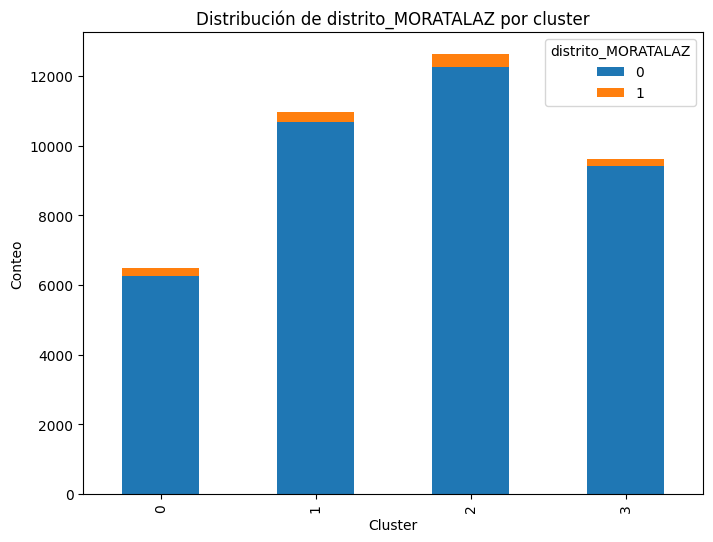


Distribución en porcentaje de distrito_PUENTE DE VALLECAS por cluster:
distrito_PUENTE DE VALLECAS          0         1
cluster                                         
0                            93.651772  6.348228
1                            91.543379  8.456621
2                            92.567086  7.432914
3                            90.382616  9.617384


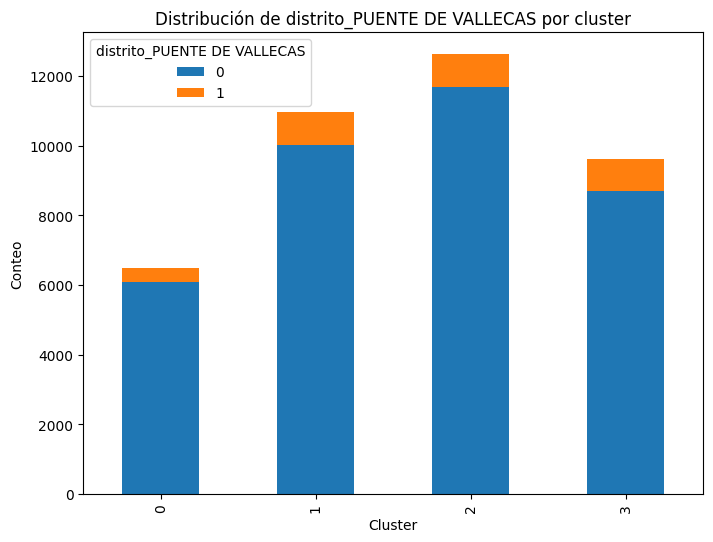


Distribución en porcentaje de distrito_RETIRO por cluster:
distrito_RETIRO          0         1
cluster                             
0                95.100154  4.899846
1                94.557078  5.442922
2                95.028893  4.971107
3                95.300478  4.699522


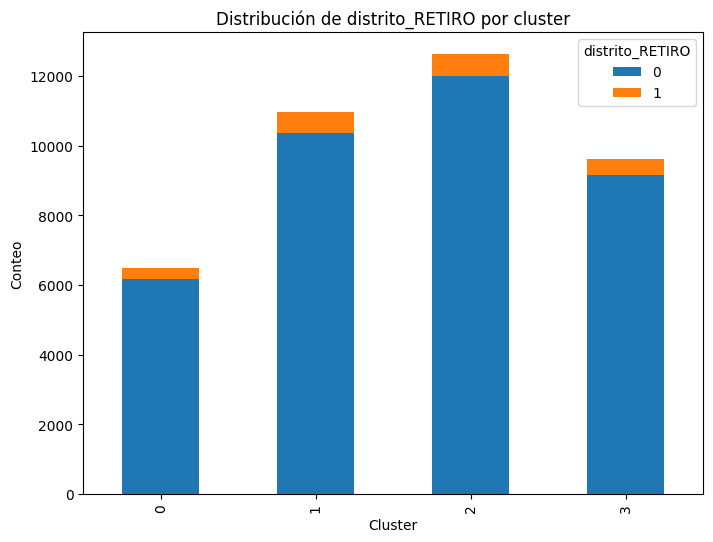


Distribución en porcentaje de distrito_SALAMANCA por cluster:
distrito_SALAMANCA          0         1
cluster                                
0                   91.941448  8.058552
1                   93.022831  6.977169
2                   94.150241  5.849759
3                   93.928052  6.071948


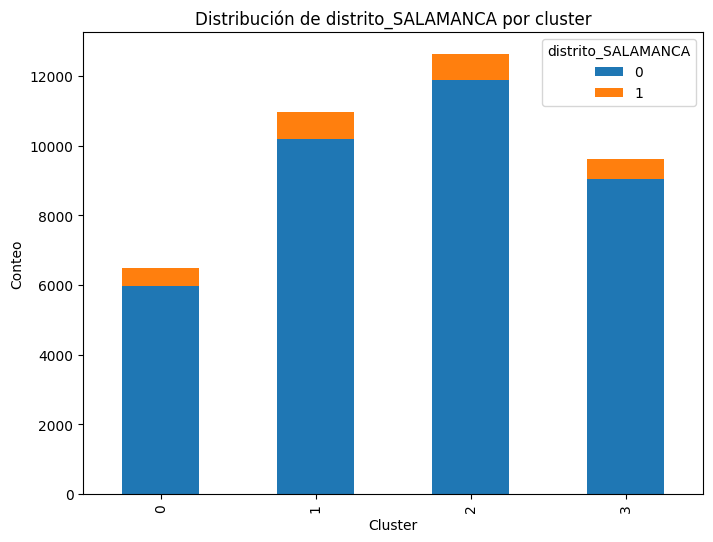


Distribución en porcentaje de distrito_SAN BLAS-CANILLEJAS por cluster:
distrito_SAN BLAS-CANILLEJAS          0         1
cluster                                          
0                             95.069337  4.930663
1                             94.867580  5.132420
2                             95.393018  4.606982
3                             95.913911  4.086089


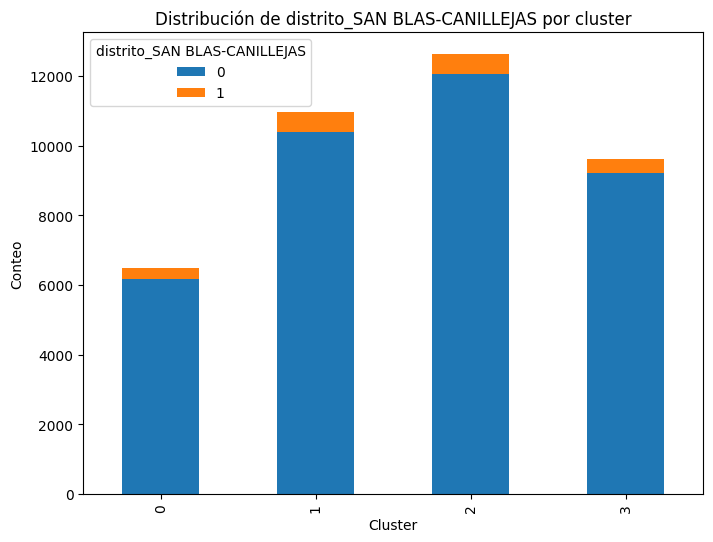


Distribución en porcentaje de distrito_TETUÁN por cluster:
distrito_TETUÁN          0         1
cluster                             
0                94.545455  5.454545
1                95.652968  4.347032
2                95.337608  4.662392
3                95.477230  4.522770


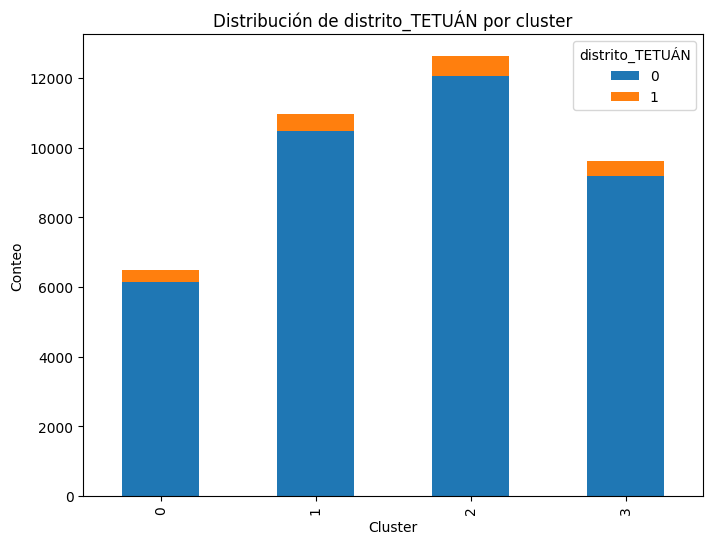


Distribución en porcentaje de distrito_USERA por cluster:
distrito_USERA          0         1
cluster                            
0               95.855162  4.144838
1               95.853881  4.146119
2               95.757144  4.242856
3               95.362861  4.637139


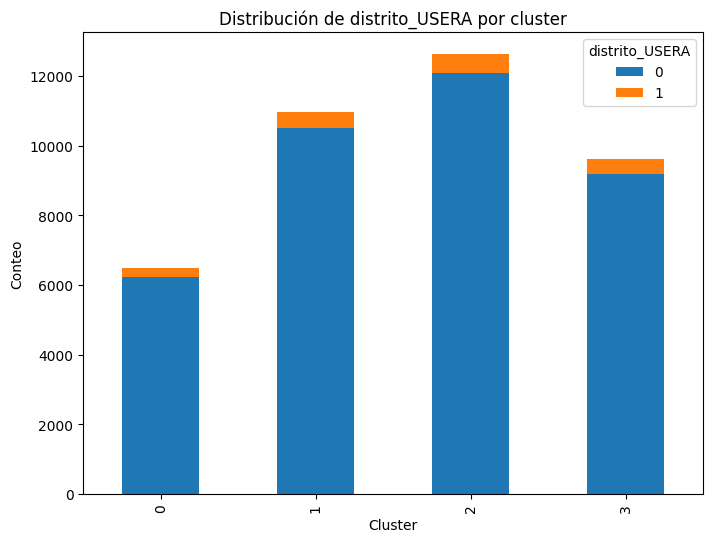


Distribución en porcentaje de distrito_VICÁLVARO por cluster:
distrito_VICÁLVARO          0         1
cluster                                
0                   98.412943  1.587057
1                   98.182648  1.817352
2                   97.933982  2.066018
3                   98.929091  1.070909


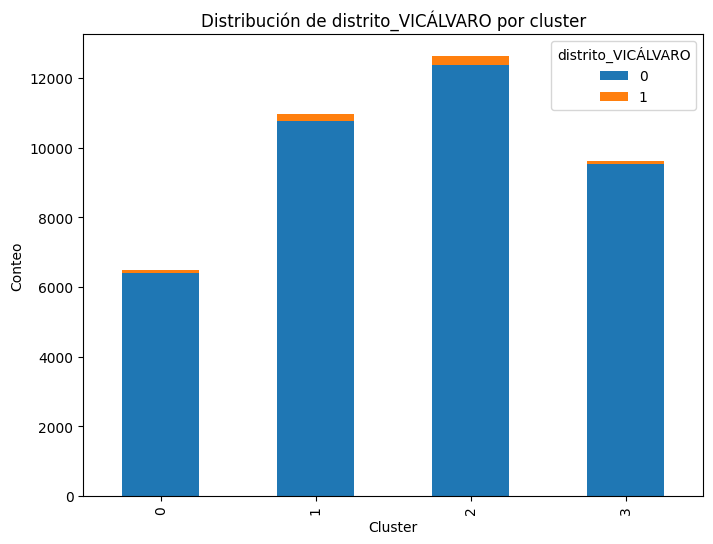


Distribución en porcentaje de distrito_VILLA DE VALLECAS por cluster:
distrito_VILLA DE VALLECAS          0         1
cluster                                        
0                           97.226502  2.773498
1                           97.452055  2.547945
2                           97.696509  2.303491
3                           97.130381  2.869619


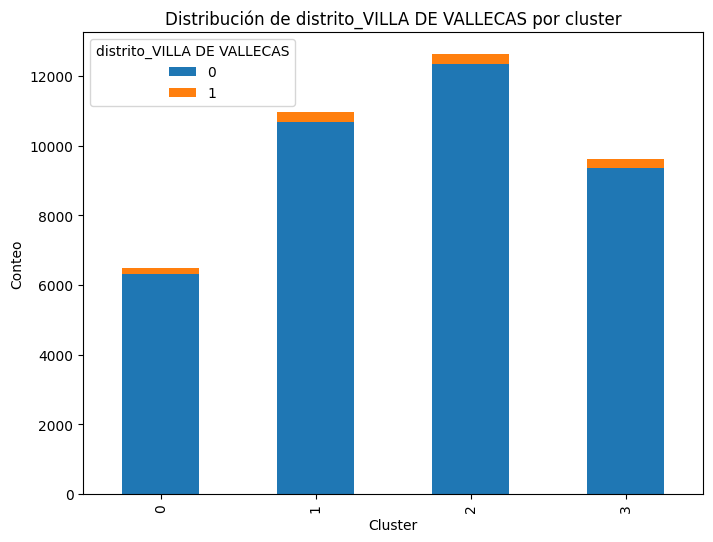


Distribución en porcentaje de distrito_VILLAVERDE por cluster:
distrito_VILLAVERDE          0         1
cluster                                 
0                    96.733436  3.266564
1                    96.794521  3.205479
2                    96.334996  3.665004
3                    96.049075  3.950925


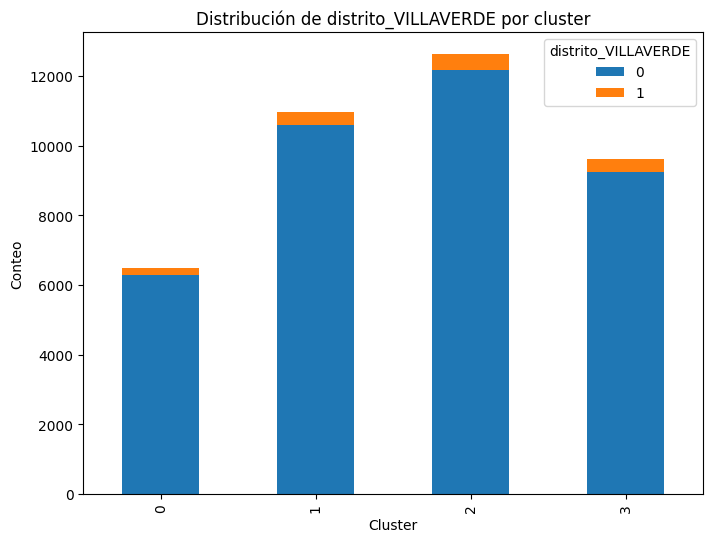

In [75]:
distrito_columns = [col for col in df.columns if col.startswith('distrito_')]

for distrito in distrito_columns:
    ctab = pd.crosstab(df['cluster'], df[distrito])
    ctab_percentage = pd.crosstab(df['cluster'], df[distrito], normalize='index') * 100

    print(f"\nDistribución en porcentaje de {distrito} por cluster:")
    print(ctab_percentage)
    
    ctab.plot(kind='bar', stacked=True, figsize=(8,6))
    plt.title(f"Distribución de {distrito} por cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Conteo")
    plt.show()

Volvemos a tener una variable muy bien distribuida por todos los clusters. Ninguna variación destacable.

##### estado_meteorológico


Distribución en porcentaje de estado_meteorológico_Despejado por cluster:
estado_meteorológico_Despejado          0          1
cluster                                             
0                               13.775039  86.224961
1                               15.388128  84.611872
2                               16.821024  83.178976
3                               14.098565  85.901435


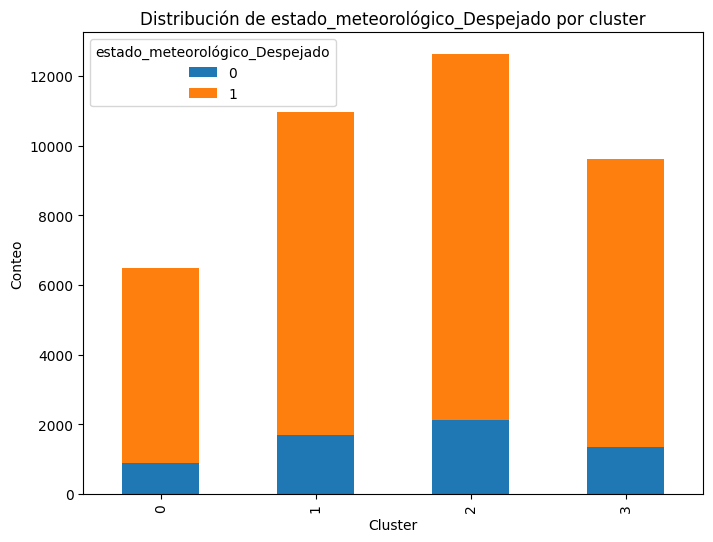


Distribución en porcentaje de estado_meteorológico_Granizando por cluster:
estado_meteorológico_Granizando           0         1
cluster                                              
0                                100.000000  0.000000
1                                100.000000  0.000000
2                                100.000000  0.000000
3                                 99.916823  0.083177


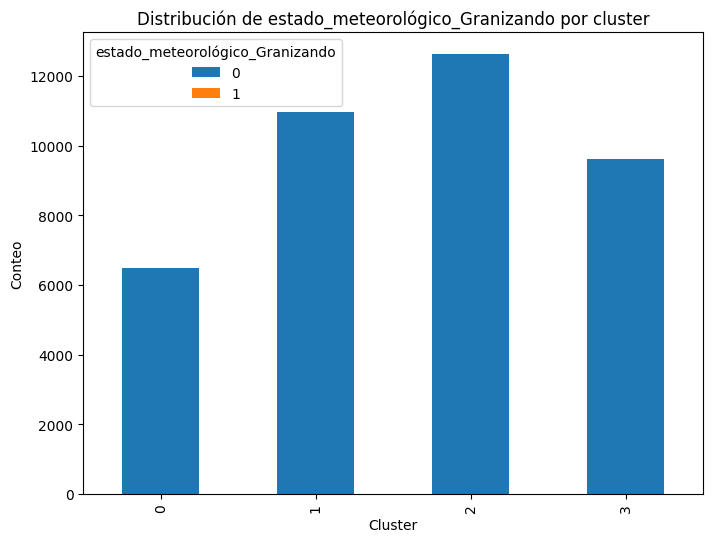


Distribución en porcentaje de estado_meteorológico_LLuvia intensa por cluster:
estado_meteorológico_LLuvia intensa          0         1
cluster                                                 
0                                    98.782743  1.217257
1                                    99.059361  0.940639
2                                    98.147708  1.852292
3                                    99.168226  0.831774


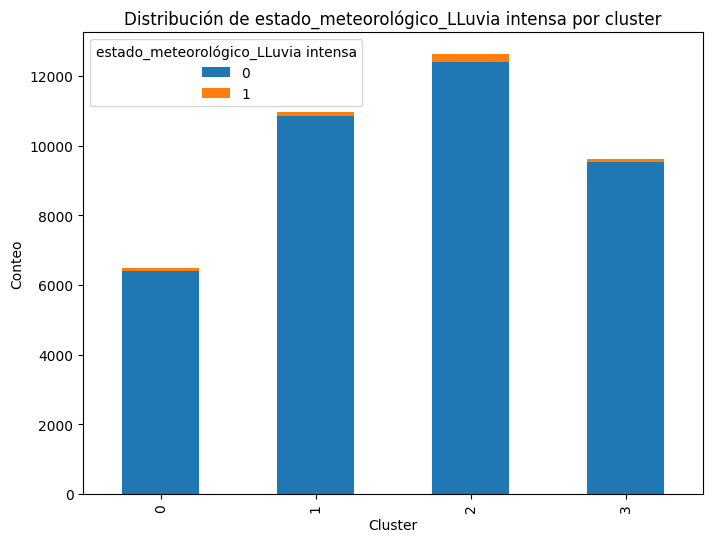


Distribución en porcentaje de estado_meteorológico_Lluvia débil por cluster:
estado_meteorológico_Lluvia débil          0         1
cluster                                               
0                                  95.007704  4.992296
1                                  93.643836  6.356164
2                                  93.002454  6.997546
3                                  94.323144  5.676856


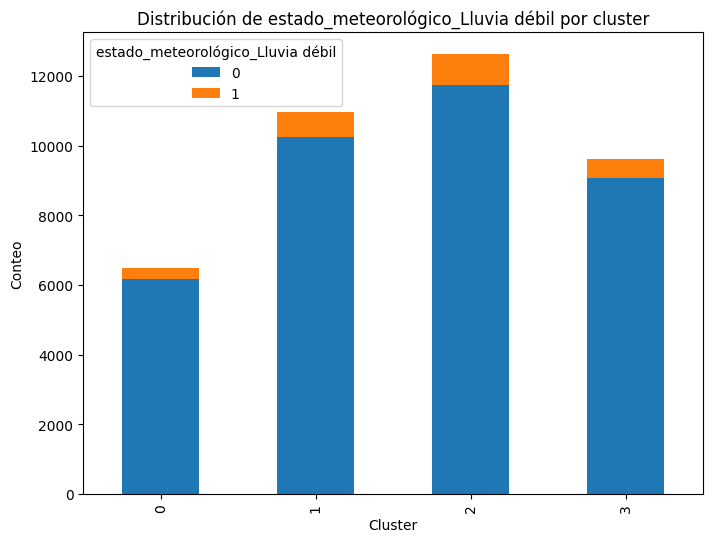


Distribución en porcentaje de estado_meteorológico_Nevando por cluster:
estado_meteorológico_Nevando           0         1
cluster                                           
0                             100.000000  0.000000
1                             100.000000  0.000000
2                             100.000000  0.000000
3                              99.979206  0.020794


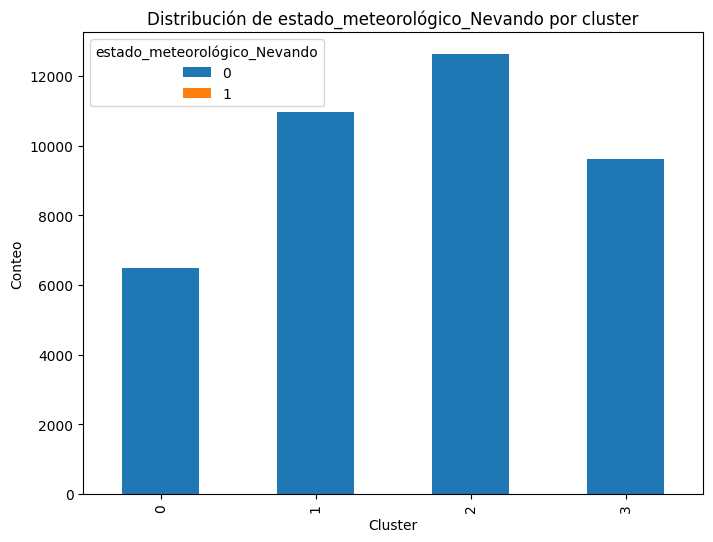


Distribución en porcentaje de estado_meteorológico_Nublado por cluster:
estado_meteorológico_Nublado          0         1
cluster                                          
0                             92.434515  7.565485
1                             91.908676  8.091324
2                             92.028813  7.971187
3                             92.514036  7.485964


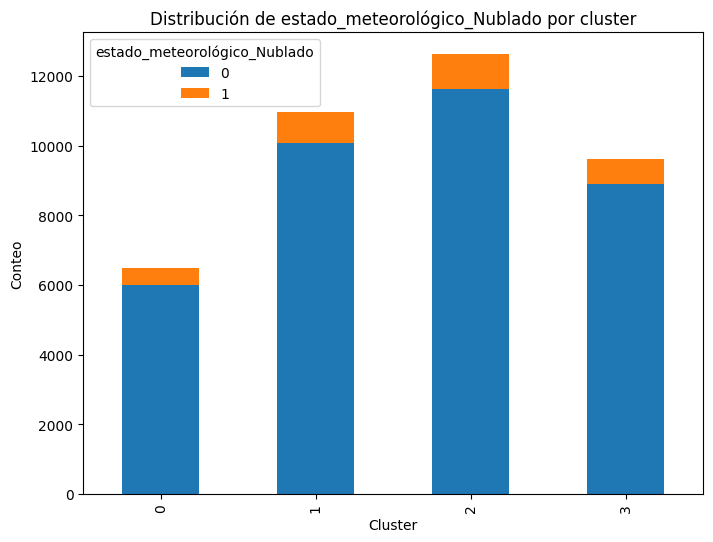

In [76]:
estado_meteorologico_columns = [col for col in df.columns if col.startswith('estado_meteorológico_')]

for estado_meteorologico in estado_meteorologico_columns:
    ctab = pd.crosstab(df['cluster'], df[estado_meteorologico])
    ctab_percentage = pd.crosstab(df['cluster'], df[estado_meteorologico], normalize='index') * 100

    print(f"\nDistribución en porcentaje de {estado_meteorologico} por cluster:")
    print(ctab_percentage)
    
    ctab.plot(kind='bar', stacked=True, figsize=(8,6))
    plt.title(f"Distribución de {estado_meteorologico} por cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Conteo")
    plt.show()

Esta variable está representada con una distribución casi idéntica en todos los clusters.

##### meses

In [83]:
mes_cluster = pd.crosstab(df['cluster'], df['mes'])
ctab_percentage = pd.crosstab(df['cluster'], df['mes'], normalize='index') * 100


Distribución en porcentaje de meses por cluster:
mes             1          2          3          4          5          6   \
cluster                                                                     
0        10.200308   8.289676   8.382126  11.171032  10.662558   9.830508   
1        10.584475   9.488584   9.013699  10.684932  10.219178   9.634703   
2         8.889417  11.446212  10.037204  11.161244  12.237790  10.148025   
3         9.149511   9.482221  12.164691   9.918902  11.021002  12.642961   

mes             7         8          9          10  
cluster                                             
0        11.941448  6.348228  10.600924  12.573190  
1        10.557078  6.310502  10.812785  12.694064  
2         8.311565  7.076704   9.419774  11.272065  
3         8.089000  6.872531  10.854648   9.804533  


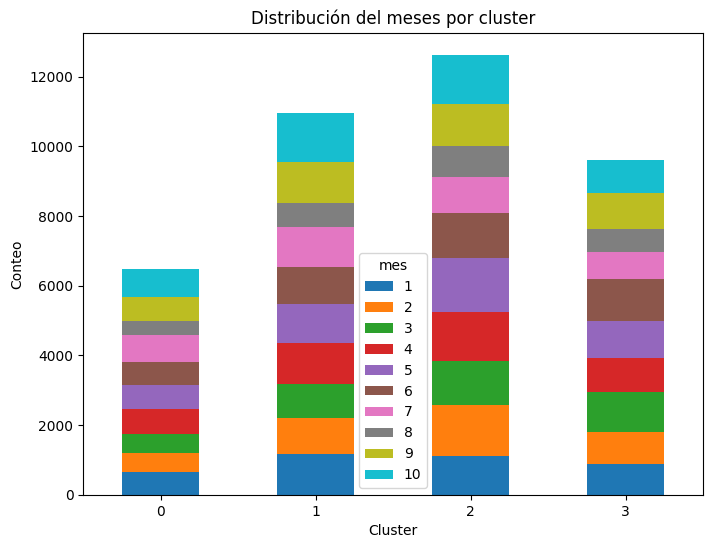

In [84]:
print(f"\nDistribución en porcentaje de meses por cluster:")
print(ctab_percentage)
mes_cluster.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Distribución del meses por cluster")
plt.xlabel("Cluster")
plt.ylabel("Conteo")
plt.xticks(rotation=0)
plt.show()

Vemos algo de variación en el mes 3 (Marzo) entre el cluster 0 y el 3. En algun valor más vemos variaciones parecidas pero no son diferencias significativas, veamos la siguiente.

##### es_fin_de_semana

In [85]:
finde_cluster = pd.crosstab(df['cluster'], df['es_fin_semana'])
ctab_percentage = pd.crosstab(df['cluster'], df['es_fin_semana'], normalize='index') * 100


Distribución en porcentaje de fines de semana por cluster:
es_fin_semana      0      1
cluster                    
0              100.0    0.0
1              100.0    0.0
2              100.0    0.0
3                0.0  100.0


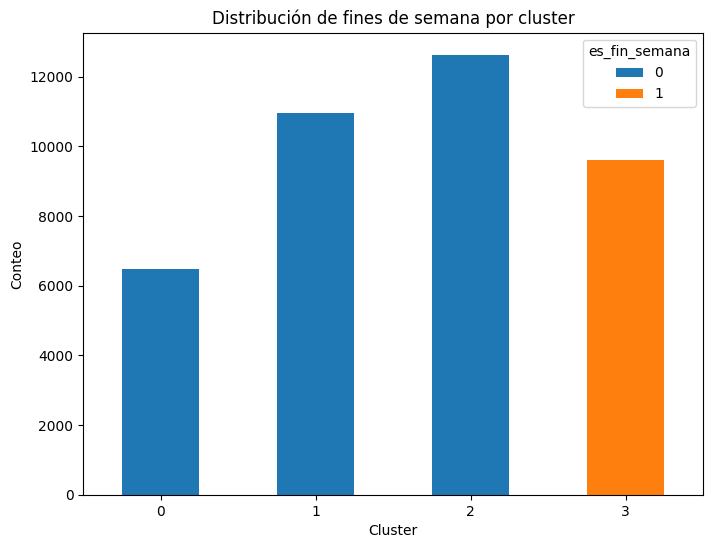

In [86]:
print(f"\nDistribución en porcentaje de fines de semana por cluster:")
print(ctab_percentage)
finde_cluster.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Distribución de fines de semana por cluster")
plt.xlabel("Cluster")
plt.ylabel("Conteo")
plt.xticks(rotation=0)
plt.show()

Aquí hemos encontrado una variable que separa uno de los clusters. Vemos como en el cluster 3 todos los datos son de accidentes producidos en fines de semana mientras que en el resto de clusters no encontramos ninguno. 

##### coordenadas por cluster

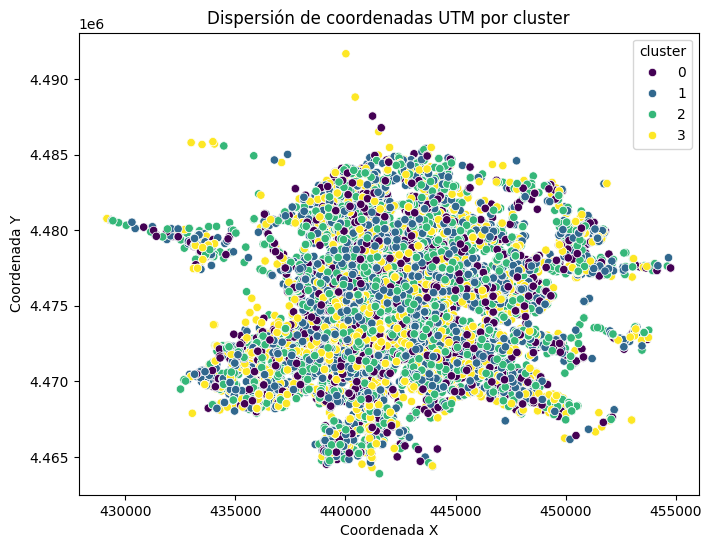

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='coordenada_x_utm', y='coordenada_y_utm', hue='cluster', palette="viridis")
plt.title("Dispersión de coordenadas UTM por cluster")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.show()


Hemos graficado un mapa con las coordenadas para ver si se agrupaban siguiendo alguna relación geográfica pero no es el caso.

##### Conclusión

Las relaciones que Kmeans utiliza para separar los datos son complejas y algo complicadas de analizar ya que trabaja con todas las columnas a la vez y hace cálculos con todas ellas. Sin embargo, hemos logrado encontrar la variable que diferencia a uno de los clusters por completo.

## Tarea 3.5

Vamos a importar los resultados del clustering jerárquico para compararlos mejor.

In [58]:
resultados_clustering = pd.read_csv('resultados_clustering.csv')

Ahora, vamos a realizar un kmeans de 2 a 20 clusters para compararlo con los mismos datos con los que creamos el DataFrame jerárquico. Analizamos con los mismos tres índices y almacenamos los resultados.


In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np


results = {
    'silhouette': [],
    'calinski_harabasz': [],
    'davies_bouldin': []
}

linkage = "kmeans"  
metric = "euclidean"  

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels, metric=metric)
    calinski_harabasz = calinski_harabasz_score(X, cluster_labels)
    davies_bouldin = davies_bouldin_score(X, cluster_labels)
    
    results['silhouette'].append({
        'value': silhouette_avg,
        'n_clusters': n_clusters,
        'linkage': linkage,
        'metric': metric
    })
    results['calinski_harabasz'].append({
        'value': calinski_harabasz,
        'n_clusters': n_clusters,
        'linkage': linkage,
        'metric': metric
    })
    results['davies_bouldin'].append({
        'value': davies_bouldin,
        'n_clusters': n_clusters,
        'linkage': linkage,
        'metric': metric
    })

In [59]:
results

{'silhouette': [{'value': np.float64(0.06691914698591928),
   'n_clusters': 2,
   'linkage': 'kmeans',
   'metric': 'euclidean'},
  {'value': np.float64(0.06034777282473788),
   'n_clusters': 3,
   'linkage': 'kmeans',
   'metric': 'euclidean'},
  {'value': np.float64(0.07054358374494397),
   'n_clusters': 4,
   'linkage': 'kmeans',
   'metric': 'euclidean'},
  {'value': np.float64(0.06179074461004866),
   'n_clusters': 5,
   'linkage': 'kmeans',
   'metric': 'euclidean'},
  {'value': np.float64(0.06026976805804705),
   'n_clusters': 6,
   'linkage': 'kmeans',
   'metric': 'euclidean'},
  {'value': np.float64(0.05158759676581704),
   'n_clusters': 7,
   'linkage': 'kmeans',
   'metric': 'euclidean'},
  {'value': np.float64(0.04958443048296621),
   'n_clusters': 8,
   'linkage': 'kmeans',
   'metric': 'euclidean'},
  {'value': np.float64(0.053187430348902186),
   'n_clusters': 9,
   'linkage': 'kmeans',
   'metric': 'euclidean'},
  {'value': np.float64(0.05036884917484392),
   'n_cluste

Aquí, creamos nuestro dataframe con los datos del Kmeans

In [61]:
silhouette_data = [{'Algoritmo': 'Kmeans', 'Indice': 'Silhouette', 'Valor': x['value'], 'N_clusters': x['n_clusters']} for x in results['silhouette']]
calinski_data = [{'Algoritmo': 'Kmeans', 'Indice': 'Calinski-Harabasz', 'Valor': x['value'], 'N_clusters': x['n_clusters']} for x in results['calinski_harabasz']]
davies_data = [{'Algoritmo': 'Kmeans', 'Indice': 'Davies-Bouldin', 'Valor': x['value'], 'N_clusters': x['n_clusters']} for x in results['davies_bouldin']]


all_results = silhouette_data + calinski_data + davies_data
df_all_results = pd.DataFrame(all_results)

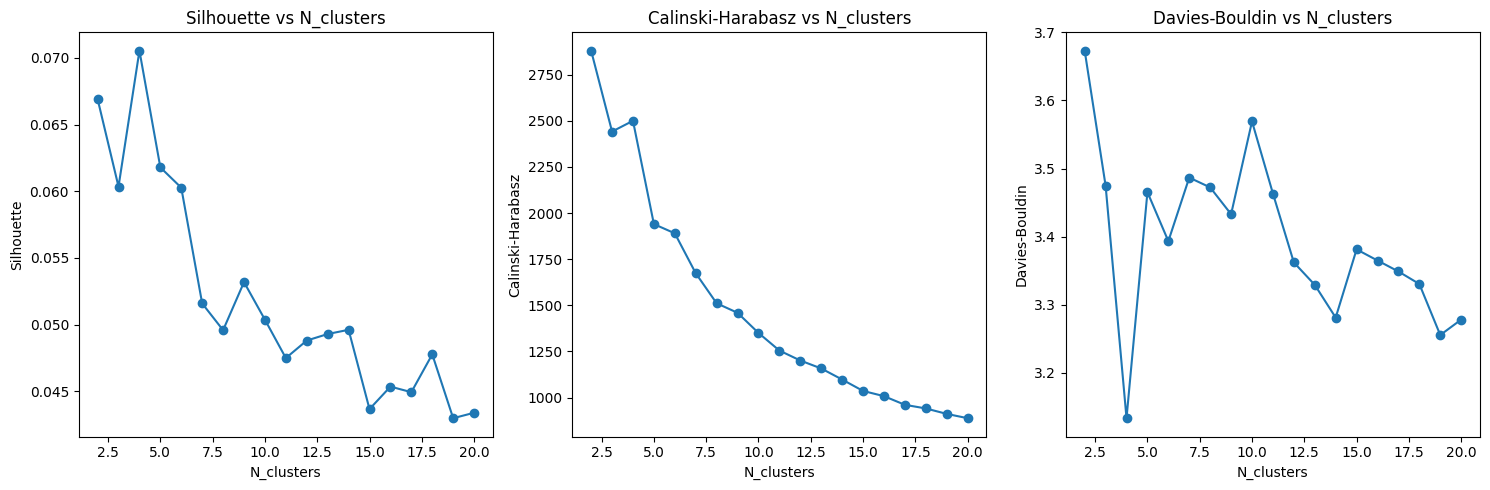

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Filtrar los datos para cada índice
for i, metric in enumerate(['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']):
    ax = axes[i]
    metric_data = df_all_results[df_all_results['Indice'] == metric]
    ax.plot(metric_data['N_clusters'], metric_data['Valor'], marker='o')
    ax.set_xlabel('N_clusters')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} vs N_clusters')

plt.tight_layout()
plt.show()

Estas gráficas son las mismas que las que hemos utilizado anteriormente en este mismo notebook, aunque un poco más extensas en el caso de Calinski-Harabasz y Davies-Bouldin. Vamos a concatenar este dataframe con el que almacena los resultados jerárquicos.

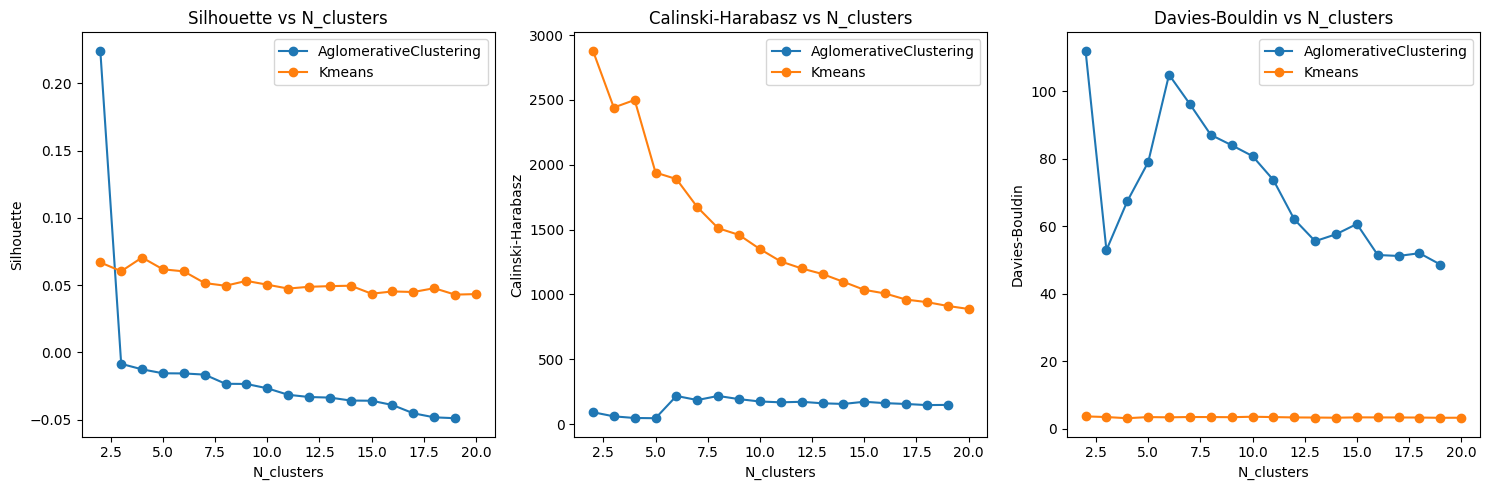

In [65]:
df_combined = pd.concat([resultados_clustering, df_all_results], ignore_index=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']):
    ax = axes[i]
    metric_data = df_combined[df_combined['Indice'] == metric]
    for alg in metric_data['Algoritmo'].unique():
        alg_data = metric_data[metric_data['Algoritmo'] == alg]
        ax.plot(alg_data['N_clusters'], alg_data['Valor'], marker='o', label=alg)
    ax.set_xlabel('N_clusters')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} vs N_clusters')
    ax.legend()

plt.tight_layout()
plt.show()

Analizando las gráficas, vemos resultados muy diferentes en función del índice utilizado.  
**Según Silhouette**:  
La agrupación con AglomerativeClustering de 2 clusters es la mejor con diferencia obteniendo los mejores resultados. Sin embargo, con el resto de valores de n_clusters el kmeans nos ofrece mejores resultados que aparentemente logran mantenerse bastante elevados. Por otro lado, para cualquier valor de n_clusters distinto de 2, el algoritmo jerárquico tiene métricas de Silhouette negativas. 

**Según Calinski-Harabasz**:  
La agrupación mediante Kmeans supera con creces en todos los casos estudiados al clustering jerárquico. La mejor agrupación se obtiene con dos clusters, mientras que la mejor agrupación del algoritmo jerárquico, con 6.

**Según Davies-Bouldin**:  
El K means domina la métrica en cada uno de los diferentes valores de n_clusters. 

Teniendo todo esto en cuenta, nuestra conclusión es que si queremos hacer dos clusters, la mejor opción es utilizar AglomerativeClustering, ya que Silhouette es el índice de evaluación más fiable y la diferencia con el resto de valores es demasiado grande como para obviarla. Sin embargo, si queremos agrupar nuestros datos con cualquier otro valor de N_clusters, lo mejor es utilizar kmeans. Este algoritmo domina al algoritmo jerárquico en casi todos los aspectos y seguramente con dos clusters también haría un buen trabajo, pero creemos que la mejor opción es utilizarlo cuando N_clusters != 2.

In [67]:
df_combined.to_csv('resultados_clustering.csv', index=False)

print("Resultados detallados y mejorados guardados en 'resultados_mejorados_clustering.csv'")

Resultados detallados y mejorados guardados en 'resultados_mejorados_clustering.csv'
